In [5]:
# scripts fits parabolas for mdh1 and dpy23 datasets 
# and find the mean value that can be applied to the intron channel

In [6]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import csv as csv

# general 
import os
import glob
from functools import reduce
import re
import sys as sys

from numpy import polyval

import pandas as pd

%matplotlib inline

In [7]:
# function for loading one data-set
def load_data(file_path):
    data = np.loadtxt(file_path, delimiter = '\t', skiprows=0)
    # print(data.shape) 
    # handles some weird cases, e.g. when there is no data in the file
    if (len(data.shape) < 2):
        data = data[None, :]
    if (data.shape[1] == 0):
        I = np.array([0])
        z = np.array([0])
    else:
        I = data[:, -1]
        z = data[:, -2]
    return (z, I)

In [8]:
def g_x(a, x):
    return polyval(a, x)

In [14]:
# general setup for pretty images 
# num_files = 16
# lines_params = np.zeros([num_files, 2])
# channel_id = 1 # 1,2,3
# folder_path = '/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/2018-04-24-15-33-21-median-median-first-test/csv/' 
#  image = 'N2_dpy-23_ex_int_ama-1_016'
Ia_min, Ia_max = 0, 40000
za_min, za_max = 0, 55

# TODO: make this one a global argument
folder_path = '/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/'
experiment_name = 'N2'

In [34]:
# possible labels 
stain = ['DPY-23_EX', 'WDR-5.2', 'MDH-1', 'DPY-23_INT']
stage = 'E' # only embryos
comment = '' # only empty ones

In [35]:
# important indices
stain_columns = ['C0_stain', 'C1_stain', 'C2_stain', 'C3_stain', 'C4_stain']
type_columns = ['C0_type', 'C1_type', 'C2_type', 'C3_type', 'C4_type']
stain_prefix = np.array([['C1-', 'C2-', 'C3-', 'C4-', 'C5-']])
ext = '.csv'
filename_column = 'new filename'

In [36]:
# read the db and parse images that we want to process
df = pd.read_csv(folder_path + "smFISH-database/" + experiment_name + "-Table 1.csv", sep=',', na_values=['']);
df.head()

Line   ID  C0_lambda C0_stain    C0_type  C1_lambda C1_stain C1_type  \
0   N2  1.0      670.0     FISH  DPY-23_EX      488.0       AF     NaN   
1   N2  2.0      670.0     FISH  DPY-23_EX      488.0       AF     NaN   
2   N2  3.0      670.0     FISH  DPY-23_EX      488.0       AF     NaN   
3   N2  4.0      670.0     FISH  DPY-23_EX      488.0       AF     NaN   
4   N2  5.0      670.0     FISH  DPY-23_EX      488.0       AF     NaN   

   C2_lambda C2_stain    ...                 comment        date  \
0      405.0  NUCLEAR    ...            not complete  11/17/2016   
1      405.0  NUCLEAR    ...                    dirt  11/17/2016   
2      405.0  NUCLEAR    ...      dirt, not complete  11/17/2016   
3      405.0  NUCLEAR    ...                     NaN  11/17/2016   
4      405.0  NUCLEAR    ...            not complete  11/17/2016   

              original filename new filename  #nuclei #C0_smfish #C1_smfish  \
0  2016-11-17_N2-DPY-23-001.nd2         N2_1      2.0        NaN        NaN   
1  2016-11-17_N2-DPY-23-002.nd2         N2_2      4.0        NaN        NaN   
2  2016-11-17_N2-DPY-23-003.nd2         N2_3      1.0        NaN        NaN   
3  2016-11-17_N2-DPY-23-004.nd2         N2_4      1.0        NaN        NaN   
4  2016-11-17_N2-DPY-23-005.nd2         N2_5      3.0        NaN        NaN   

   #C2_smfish  #C3_smfish #C4_smfish  
0         NaN         NaN        NaN  
1         NaN         NaN        NaN  
2         NaN         NaN        NaN  
3         NaN         NaN        NaN  
4         NaN         NaN        NaN  

[5 rows x 30 columns]

In [37]:
# this is general
# filter to have only *good* and *embryo* files
good_indices = np.logical_and((df['stage'] == stage).tolist() , (df['comment'].isnull()).tolist())
good_indices.shape[0]
print(np.sum(good_indices == True))

596


In [38]:
# choose necessary stains
dataset1 = []
df_good = (df[type_columns].astype(np.object) == stain[0]).loc[good_indices, :]
row, col = np.where(df_good)
n_samples = df.shape[0]
new_prefix = np.repeat(stain_prefix, n_samples, axis=0)[row, col]
new_filename = df[filename_column].loc[good_indices].as_matrix()[row]
dataset1 = ["{}{}".format(a_, b_) for a_, b_ in zip(new_prefix, new_filename)]

In [39]:
# choose necessary stains
dataset2 = []
df_good = (df[type_columns].astype(np.object) == stain[1]).loc[good_indices, :]
row, col = np.where(df_good)
n_samples = df.shape[0]
new_prefix = np.repeat(stain_prefix, n_samples, axis=0)[row, col]
new_filename = df[filename_column].loc[good_indices].as_matrix()[row]
dataset2 = ["{}{}".format(a_, b_) for a_, b_ in zip(new_prefix, new_filename)]

In [41]:
# choose necessary stains
dataset3 = []
df_good = (df[type_columns].astype(np.object) == stain[2]).loc[good_indices, :]
row, col = np.where(df_good)
n_samples = df.shape[0]
new_prefix = np.repeat(stain_prefix, n_samples, axis=0)[row, col]
new_filename = df[filename_column].loc[good_indices].as_matrix()[row]
dataset3 = ["{}{}".format(a_, b_) for a_, b_ in zip(new_prefix, new_filename)]

In [65]:
# choose necessary stains
dataset4 = []
df_good = (df[type_columns].astype(np.object) == stain[3]).loc[good_indices, :]
row, col = np.where(df_good)
n_samples = df.shape[0]
new_prefix = np.repeat(stain_prefix, n_samples, axis=0)[row, col]
new_filename = df[filename_column].loc[good_indices].as_matrix()[row]
dataset4 = ["{}{}".format(a_, b_) for a_, b_ in zip(new_prefix, new_filename)]

In [95]:
def create_title(path, name_id=-1):
    # get the name of the initial image
    image_name = path.split("/")[name_id] # was 8
    # print(path.split("/"))
    # create the full title 
    title = image_name[:-4]
    return title
# create_title("/Users/kkolyva/Desktop/n2/N2-results/all/C1-N2_9.csv")

'C1-N2_9'

In [67]:
# actual plotting 
dataset_mdh1 = []
dataset_dpy23 = []
dataset_dpy23_int = []
p_dataset_mdh1 = []
p_dataset_dpy23 = []
p_dataset_dpy23_int = []

for j in range(0, len(dataset1)):
    # tmp = folder_path + "csv-before/" + dataset1[j] + ".csv"
    dataset_dpy23.append(dataset1[j])
    # tmp = folder_path + "csv-parameters/" + dataset1[j] + ".csv"
    p_dataset_dpy23.append(dataset1[j])
    # print(tmp)
    
for j in range(0, len(dataset3)):
    # tmp = folder_path + "csv-before/" + dataset3[j] + ".csv"
    dataset_mdh1.append(dataset3[j])
    # tmp = folder_path + "csv-parameters/" + dataset3[j] + ".csv"
    p_dataset_mdh1.append(dataset3[j])
    # print(tmp)
    
for j in range(0, len(dataset4)):
    # tmp = folder_path + "csv-before/" + dataset4[j] + ".csv"
    dataset_dpy23_int.append(dataset4[j])
    # tmp = folder_path + "csv-parameters/" + dataset4[j] + ".csv"
    p_dataset_dpy23_int.append(dataset4[j])
    # print(tmp)
    
    
# to be sure that the results are consistent
# dataset_dpy23 = np.sort(dataset_dpy23)
# dataset_dpy23_int = np.sort(dataset_dpy23_int)
# dataset_mdh1 = np.sort(dataset_mdh1)

# p_dataset_dpy23 = np.sort(p_dataset_dpy23)
# p_dataset_dpy23_int = np.sort(p_dataset_dpy23_int)
# p_dataset_mdh1 = np.sort(p_dataset_mdh1)

In [68]:
# check the files that you get 
print(dataset_dpy23[0], dataset_dpy23_int[0], dataset_mdh1[0])

C1-N2_9 C2-N2_342 C2-N2_159


In [72]:
# dpy23, mdh1, dpy23_intron
dataset_dpy23_mdh1_dpy23_int = []
for d1 in dataset_dpy23:
    for d2 in dataset_mdh1:
        if (d1[3:] == d2[3:]):
            for d3 in dataset_dpy23_int:
                if (d2[3:] == d3[3:]):
                    print(d1, d2, d3) 
                    dataset_dpy23_mdh1_dpy23_int.append([d1, d2, d3])
            

C1-N2_446 C2-N2_446 C3-N2_446
C1-N2_447 C2-N2_447 C3-N2_447
C1-N2_448 C2-N2_448 C3-N2_448
C1-N2_449 C2-N2_449 C3-N2_449
C1-N2_451 C2-N2_451 C3-N2_451
C1-N2_452 C2-N2_452 C3-N2_452
C1-N2_453 C2-N2_453 C3-N2_453
C1-N2_454 C2-N2_454 C3-N2_454
C1-N2_455 C2-N2_455 C3-N2_455
C1-N2_456 C2-N2_456 C3-N2_456
C1-N2_457 C2-N2_457 C3-N2_457
C1-N2_459 C2-N2_459 C3-N2_459
C1-N2_460 C2-N2_460 C3-N2_460
C1-N2_461 C2-N2_461 C3-N2_461
C1-N2_462 C2-N2_462 C3-N2_462
C1-N2_463 C2-N2_463 C3-N2_463
C1-N2_464 C2-N2_464 C3-N2_464
C1-N2_465 C2-N2_465 C3-N2_465
C1-N2_466 C2-N2_466 C3-N2_466
C1-N2_467 C2-N2_467 C3-N2_467
C1-N2_469 C2-N2_469 C3-N2_469
C1-N2_470 C2-N2_470 C3-N2_470
C1-N2_471 C2-N2_471 C3-N2_471
C1-N2_472 C2-N2_472 C3-N2_472
C1-N2_473 C2-N2_473 C3-N2_473
C1-N2_474 C2-N2_474 C3-N2_474
C1-N2_475 C2-N2_475 C3-N2_475
C1-N2_476 C2-N2_476 C3-N2_476
C1-N2_477 C2-N2_477 C3-N2_477
C1-N2_478 C2-N2_478 C3-N2_478
C1-N2_479 C2-N2_479 C3-N2_479
C1-N2_480 C2-N2_480 C3-N2_480
C1-N2_481 C2-N2_481 C3-N2_481
C1-N2_482 

In [73]:
# load the parameters from file for the fitter
def load_params(file_path):
    data = np.loadtxt(file_path, delimiter = '\t', skiprows=0)
    return data

In [74]:
labels = ['DPY-23_EX', 'MDH-1', "DPY-23_INT"] # ['DPY-23_EX', 'WDR-5.2', 'MDH-1']

In [75]:
# function to normalize the z-correction curve 
def norm_z(x, y):
    scale = np.max(x) - np.min(x)
    x_normed = (x - np.min(x))/scale
    y_normed = y / scale 
    return (x_normed, y_normed)

In [76]:
# shift so that intensity value starts at val = 0.5
def shift_z(y, top = 0.5):
    y_shift = y - np.max(y) + top 
    return y_shift

In [77]:
def find_min_max(x1, x2):
    lb = np.max([np.min(x1), np.min(x2)])
    rb = np.min([np.max(x1), np.max(x2)])
    return lb, rb

def find_min_max_idx(x1, x2):
    idx_x1 = np.argmin(x1)
    idx_x2 = np.argmin(x2)
    if (np.min(x1) > np.min(x2)):
        idx_lb = idx_x1
    else:
        idx_lb = idx_x2
        
    idx_x1 = np.argmax(x1)
    idx_x2 = np.argmax(x2)
    if (np.max(x1) > np.max(x2)):
        idx_rb = idx_x2
    else:
        idx_rb = idx_x1
        
    return idx_lb, idx_rb

In [78]:
# find the average curve of 2 curves
def compute_average_curve(coeff1, coeff2):
    return (coeff1 + coeff2)/2
compute_average_curve(np.array([1,2,3]), np.array([2,4,5]))

array([ 1.5,  3. ,  4. ])

In [79]:
img_name_dpy23 = 'C1-N2_802'
img_name_dpy23_int = 'C3-N2_802'
img_name_mdh1 = 'C2-N2_802'

s_dataset_mdh1 = folder_path + "csv-before/" + img_name_mdh1 + ".csv"
s_dataset_dpy23 = folder_path + "csv-before/" + img_name_dpy23 + ".csv"
s_dataset_dpy23_int = folder_path + "csv-before/" + img_name_dpy23_int + ".csv"

z_dpy23, I_dpy23 = load_data(s_dataset_dpy23)
z_dpy23_int, I_dpy23_int = load_data(s_dataset_dpy23_int)
z_mdh1, I_mdh1 = load_data(s_dataset_mdh1)

print(find_min_max(z_dpy23, z_mdh1))

(17.420000000000002, 57.090000000000003)


In [81]:
# plot of all ovelaping images
# have to figure out what are the min-max value
z_min = sys.float_info.max
z_max = -sys.float_info.max

# dataset_dpy23 and dataset_mdh1 sizes are the same
for img_name_dpy23_mdh1_dpy23_int in dataset_dpy23_mdh1_dpy23_int:
    
    img_name_dpy23 = img_name_dpy23_mdh1_dpy23_int[0]
    img_name_mdh1 = img_name_dpy23_mdh1_dpy23_int[1]
    img_name_dpy23_int = img_name_dpy23_mdh1_dpy23_int[2]
       
    s_dataset_mdh1 = folder_path + "csv-before/" + img_name_mdh1 + ".csv"
    ps_dataset_mdh1 = folder_path + "csv-parameters/" + img_name_mdh1 + ".csv"

    s_dataset_dpy23 = folder_path + "csv-before/" + img_name_dpy23 + ".csv"
    ps_dataset_dpy23 = folder_path + "csv-parameters/" + img_name_dpy23 + ".csv"
    
    if(not os.path.exists(s_dataset_mdh1) or not os.path.exists(s_dataset_dpy23)):
        # print("doesn't exist")
        continue
    try:
        # print("Processing:", dataset[idx]) 
        z_dpy23, I_dpy23 = load_data(s_dataset_dpy23)
        z_mdh1, I_mdh1 = load_data(s_dataset_mdh1)
        
        if (np.max(z_dpy23) > z_max):
            z_max = np.max(z_dpy23)
        if (np.max(z_mdh1) > z_max):
            z_max = np.max(z_mdh1)
        
        if (np.min(z_dpy23) < z_min):
            z_min = np.min(z_dpy23)
        if (np.min(z_mdh1)  < z_min):
            z_min = np.min(z_mdh1)
               
    except(ValueError, StopIteration, RuntimeError):
        print("Caught the error for you")

/Users/kkolyva/anaconda3/lib/python3.6/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_471.csv"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_447.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_447.csv


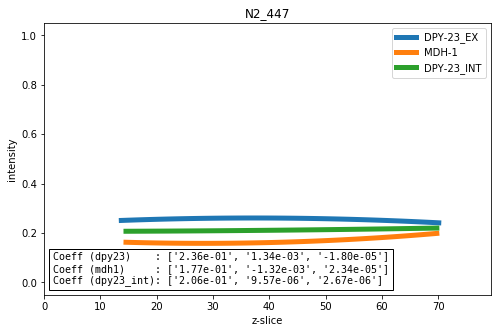

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_448.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_448.csv


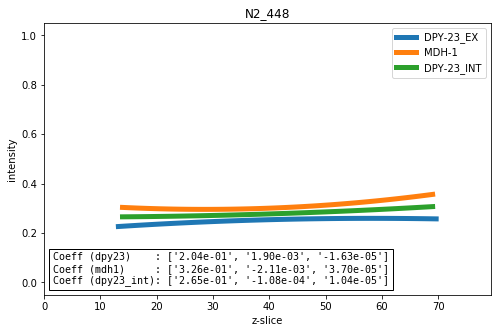

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_449.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_449.csv


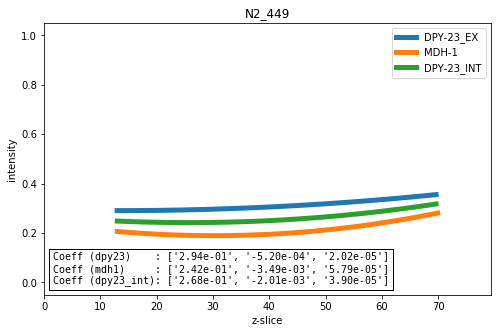

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_451.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_451.csv


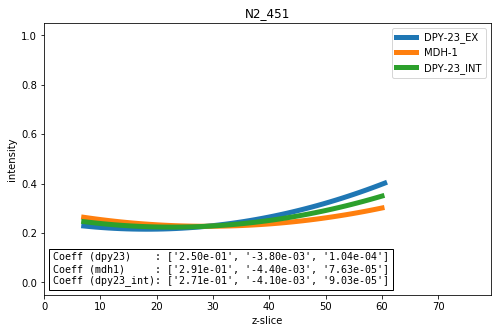

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_452.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_452.csv


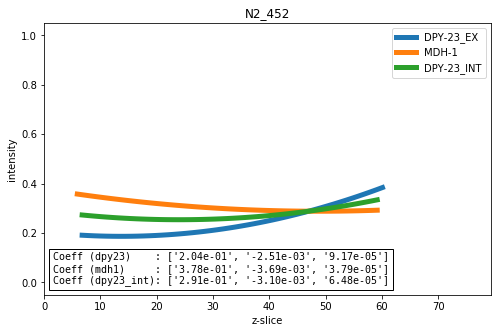

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_453.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_453.csv


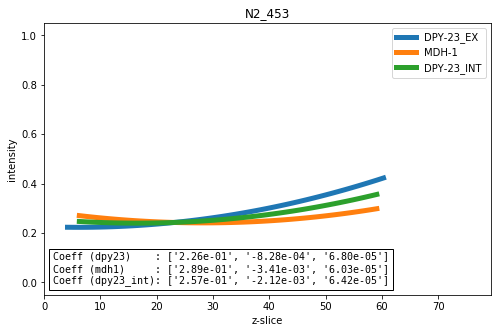

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_454.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_454.csv


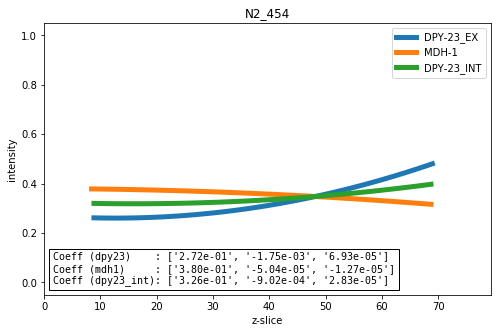

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_455.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_455.csv


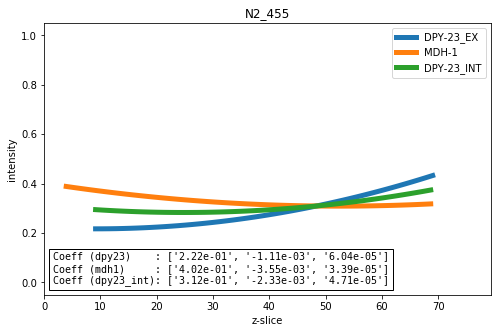

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_456.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_456.csv


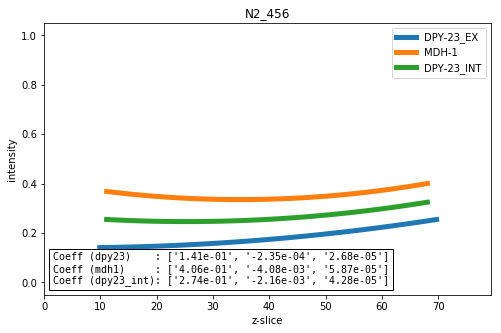

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_457.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_457.csv


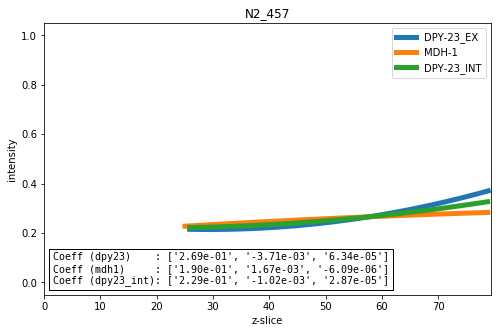

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_459.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_459.csv


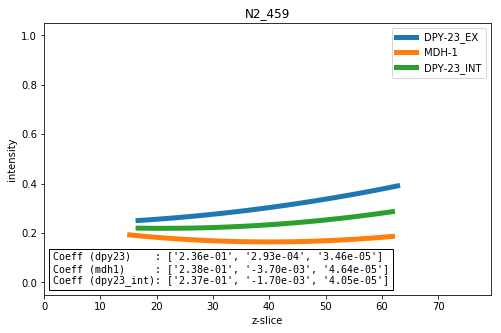

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_460.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_460.csv


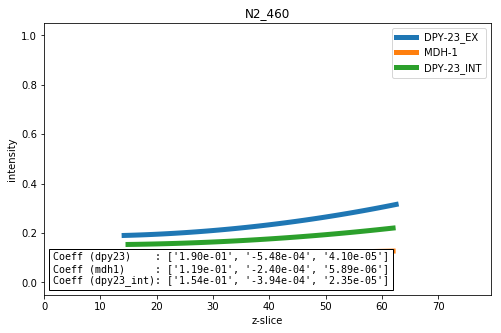

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_461.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_461.csv


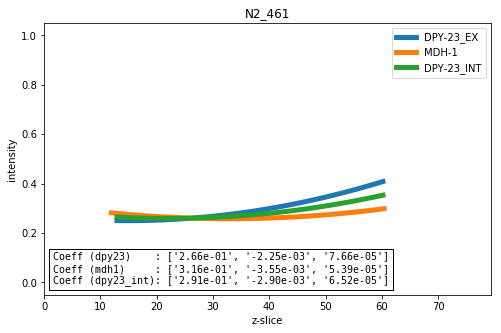

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_462.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_462.csv


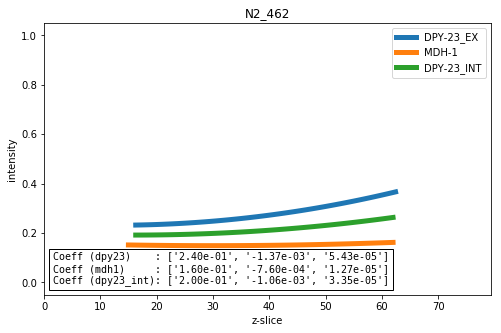

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_463.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_463.csv


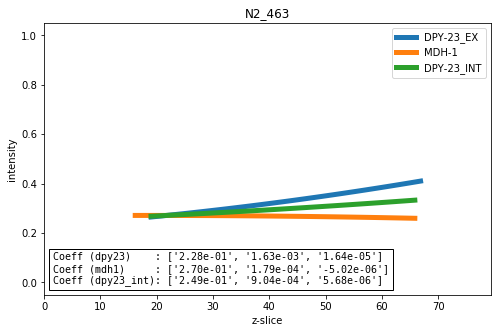

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_464.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_464.csv


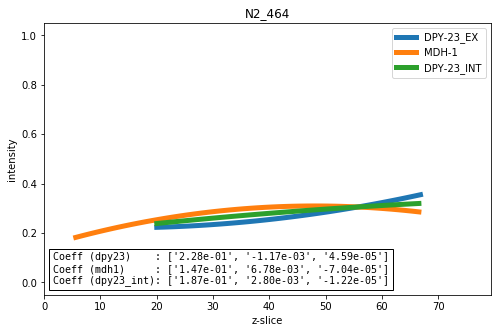

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_465.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_465.csv


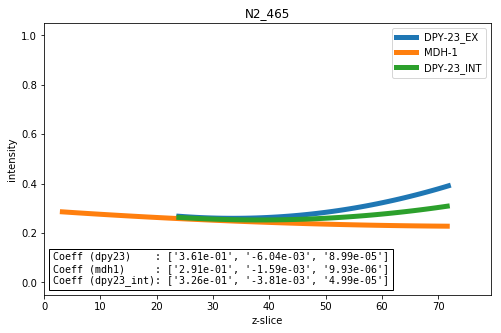

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_466.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_466.csv


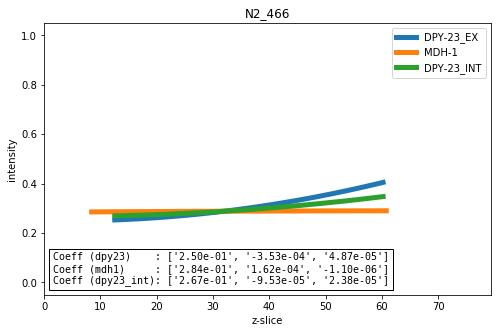

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_467.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_467.csv


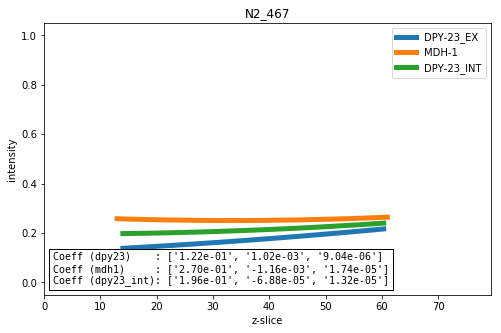

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_469.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_469.csv


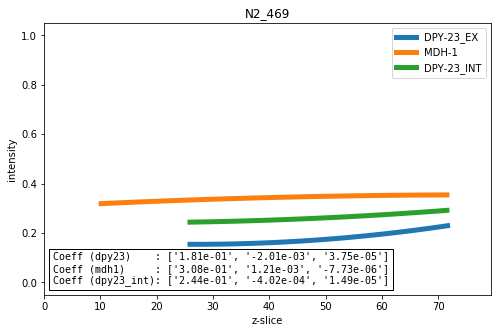

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_470.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_470.csv


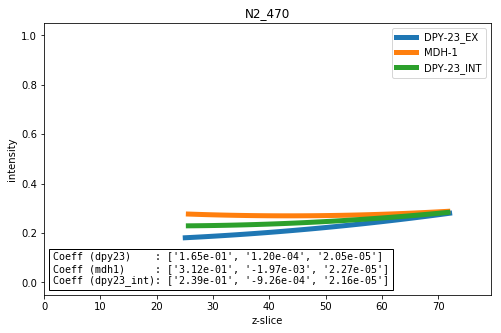

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_471.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_471.csv


/Users/kkolyva/anaconda3/lib/python3.6/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_471.csv"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


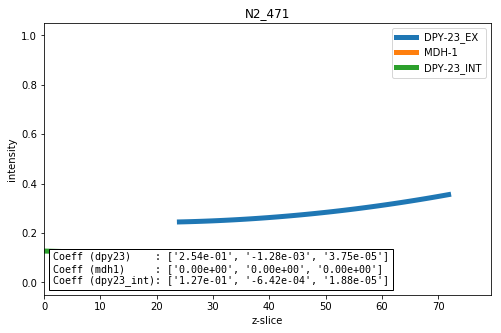

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_472.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_472.csv


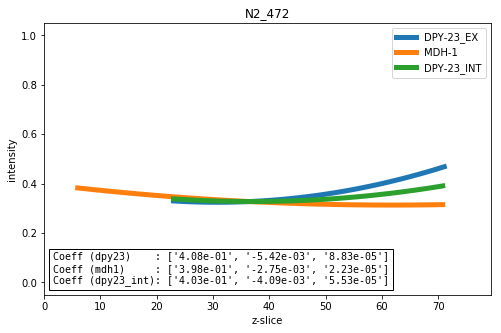

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_473.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_473.csv


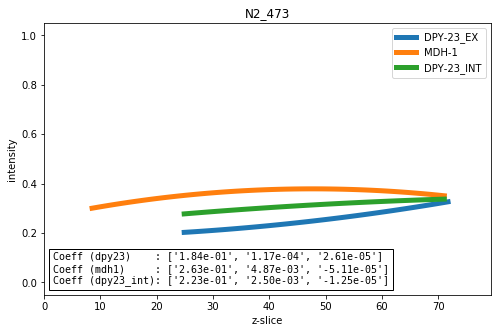

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_474.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_474.csv


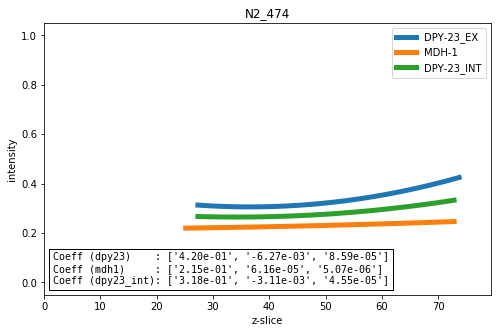

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_475.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_475.csv


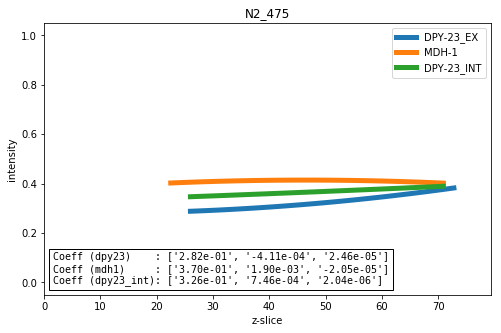

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_476.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_476.csv


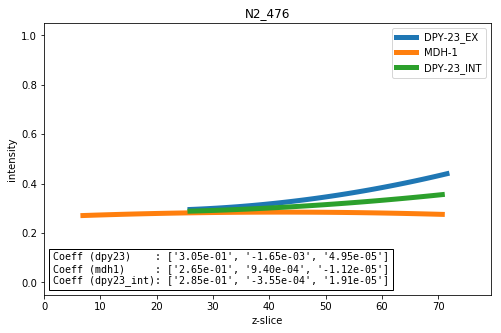

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_477.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_477.csv


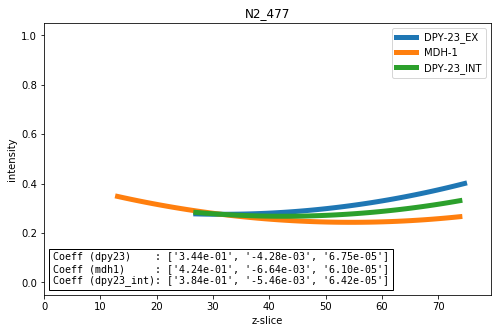

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_478.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_478.csv


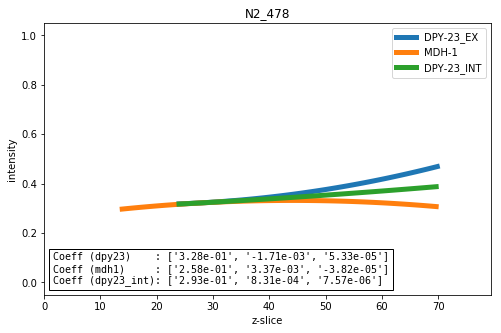

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_479.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_479.csv


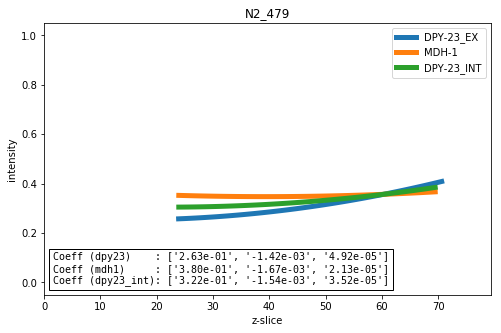

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_480.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_480.csv


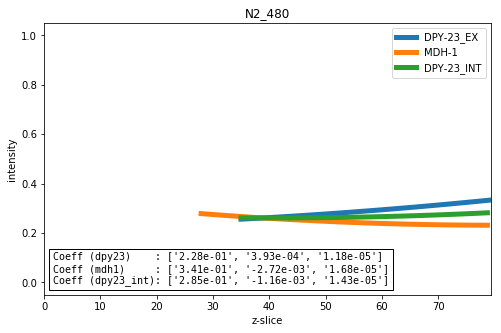

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_481.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_481.csv


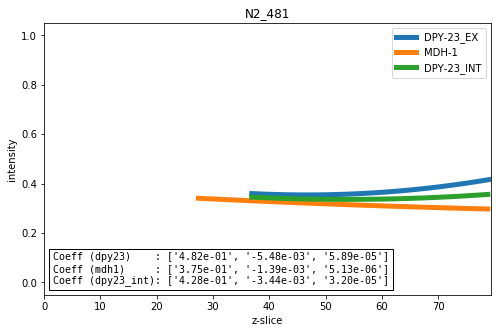

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_482.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_482.csv


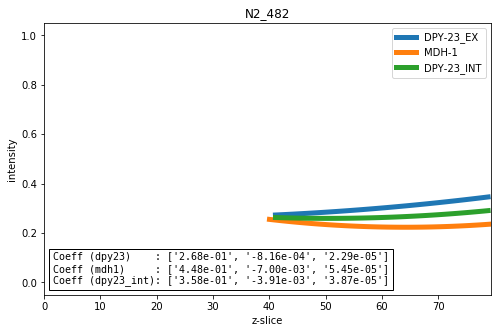

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_483.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_483.csv


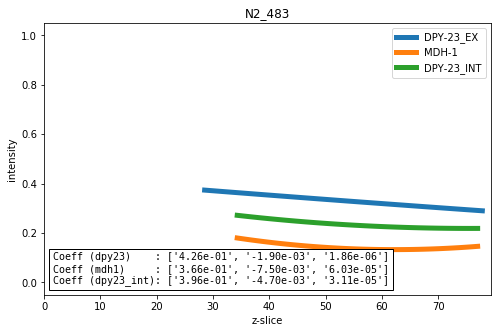

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_484.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_484.csv


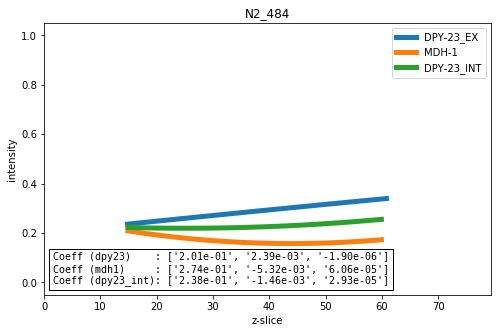

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_485.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_485.csv


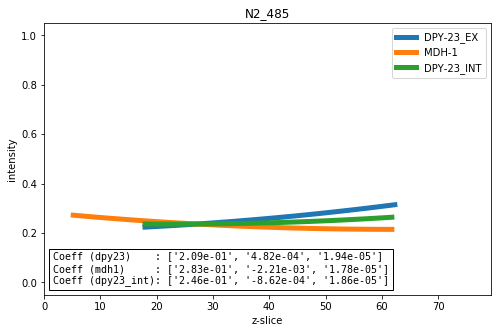

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_486.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_486.csv


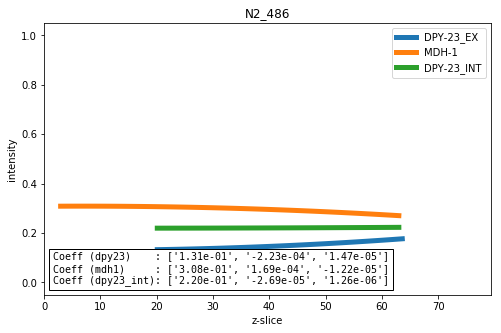

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_487.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_487.csv


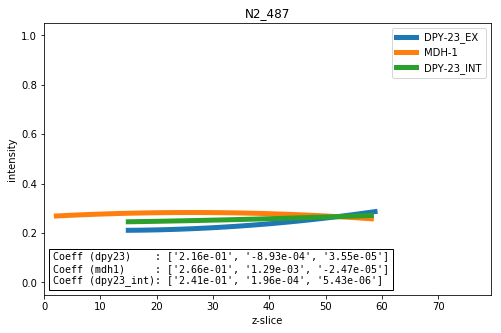

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_488.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_488.csv


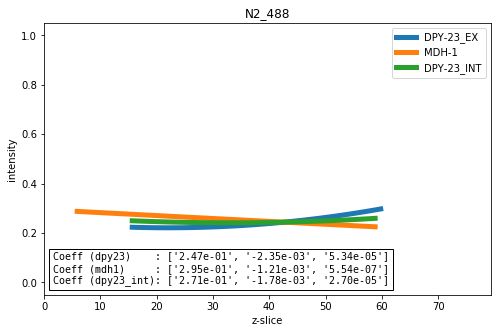

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_489.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_489.csv


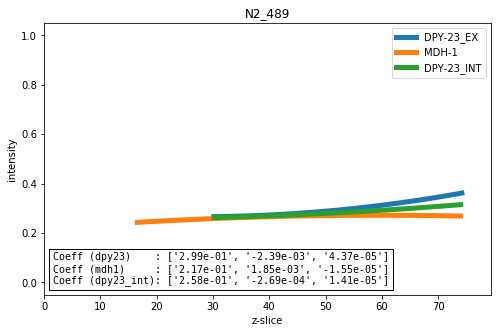

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_490.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_490.csv


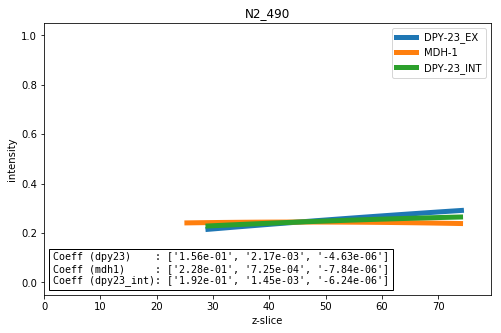

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_491.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_491.csv


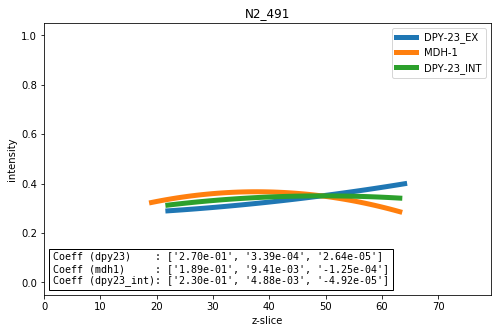

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_492.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_492.csv


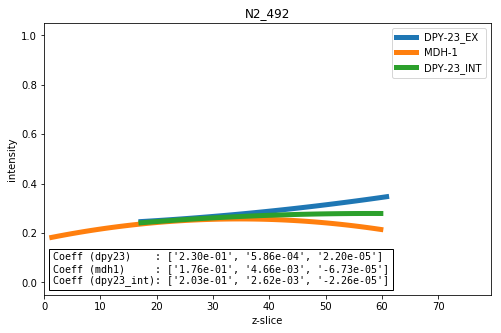

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_493.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_493.csv


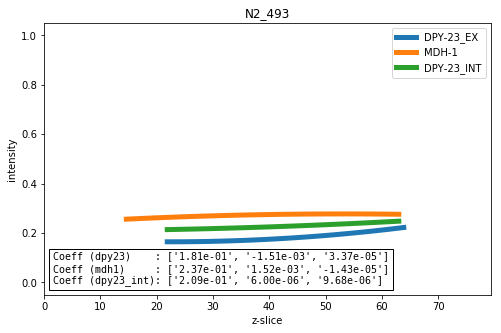

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_494.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_494.csv


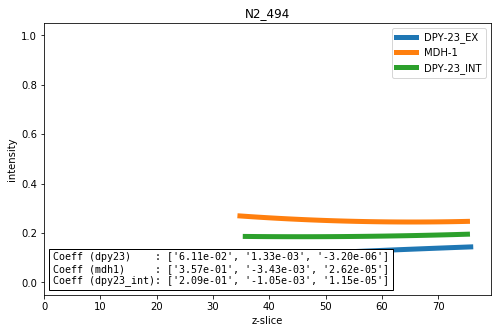

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_495.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_495.csv


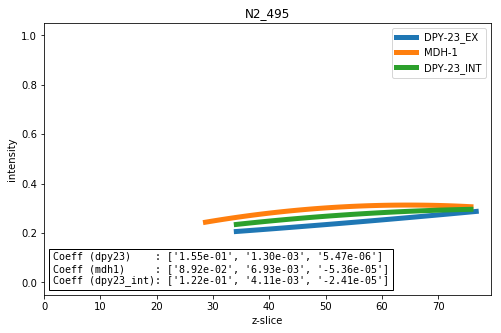

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_496.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_496.csv


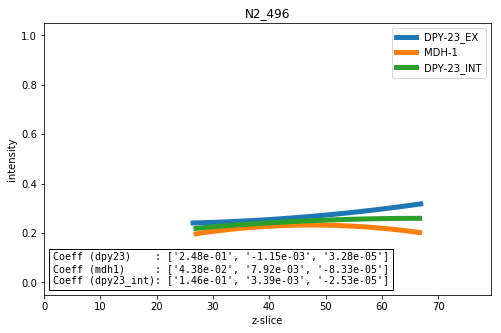

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_498.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_498.csv


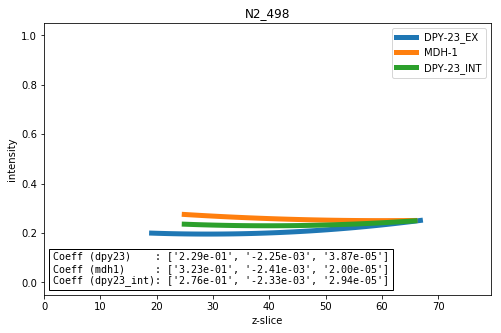

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_499.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_499.csv


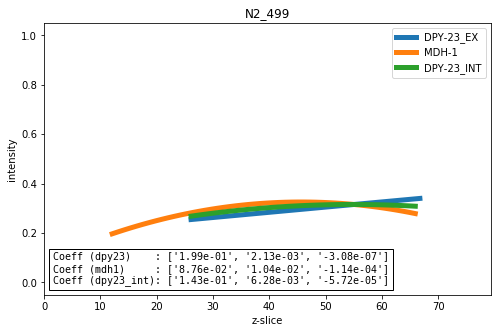

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_500.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_500.csv


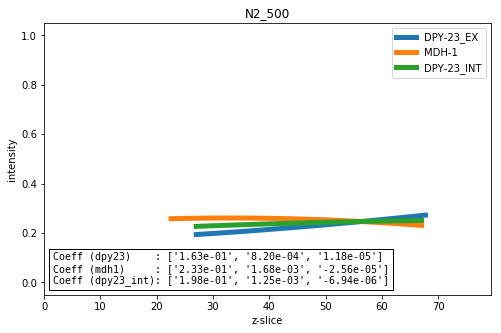

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_501.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_501.csv


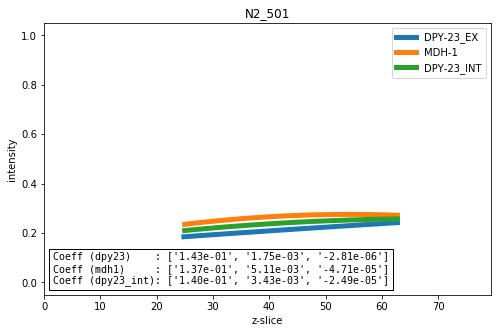

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_502.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_502.csv


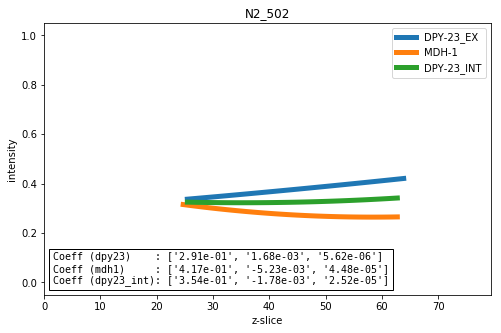

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_503.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_503.csv


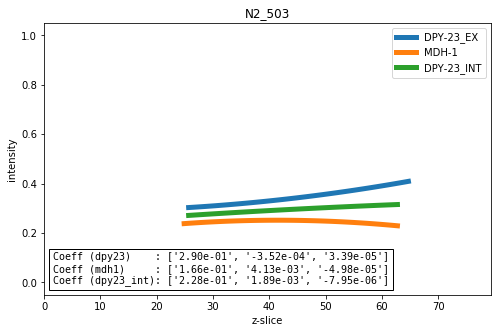

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_504.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_504.csv


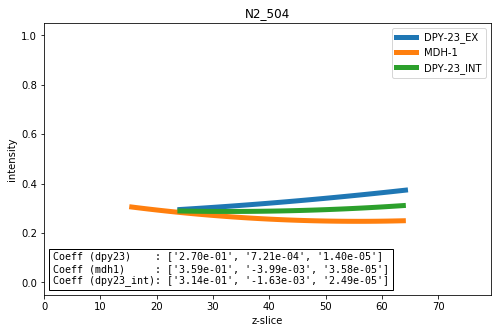

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_505.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_505.csv


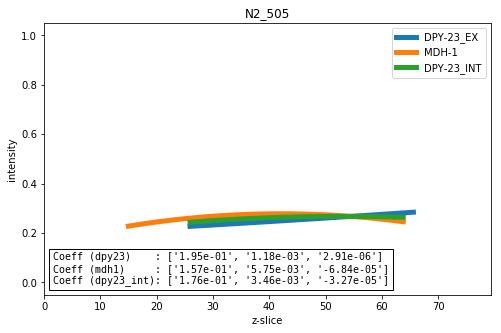

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_506.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_506.csv


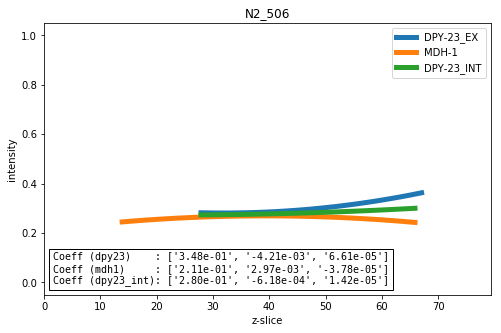

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_507.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_507.csv


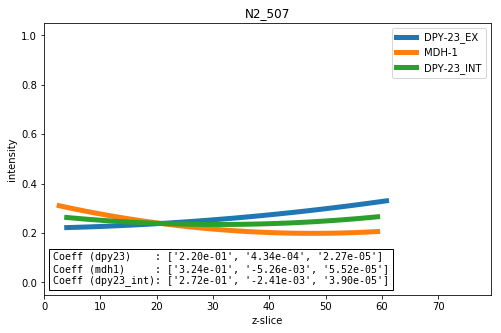

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_508.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_508.csv


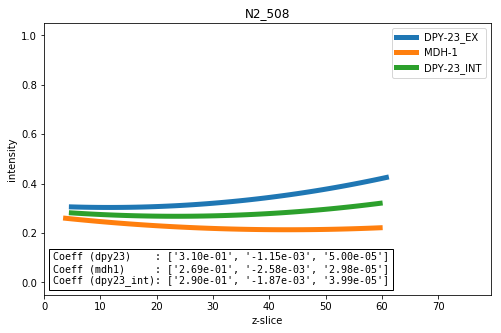

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_509.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_509.csv


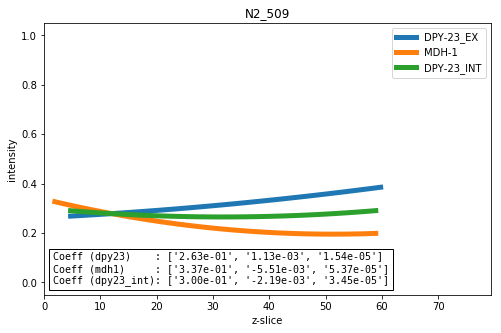

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_510.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_510.csv


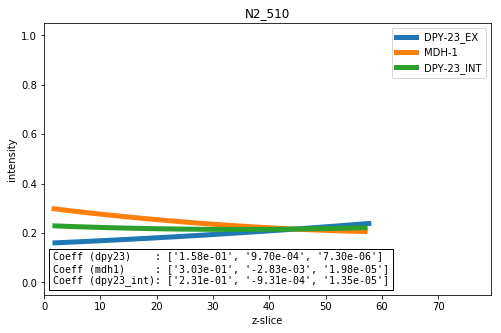

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_511.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_511.csv


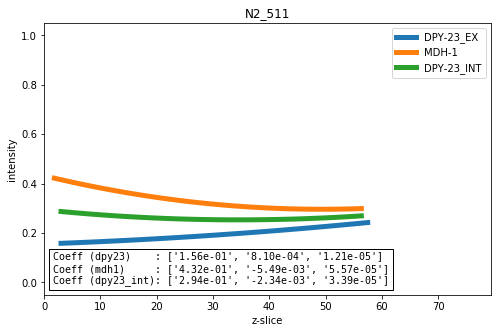

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_512.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_512.csv


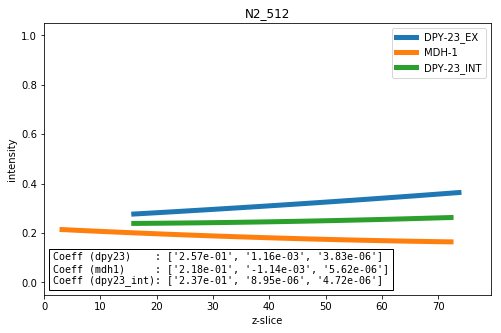

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_513.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_513.csv


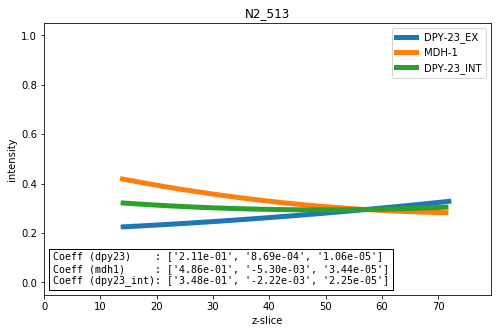

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_514.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_514.csv


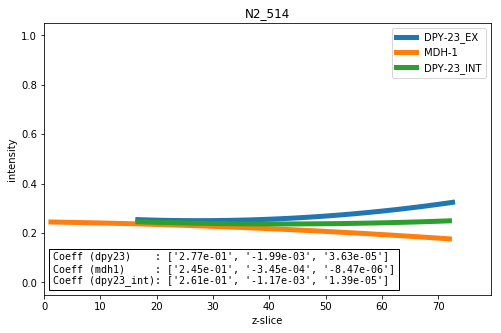

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_515.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_515.csv


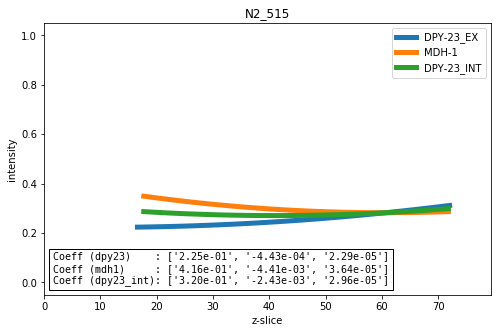

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_516.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_516.csv


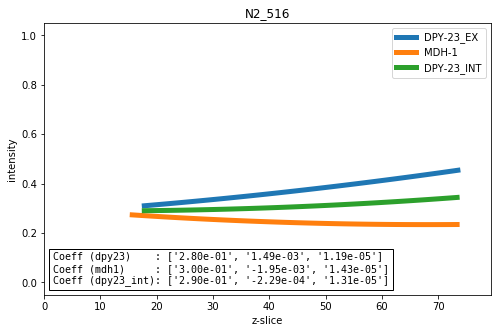

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_518.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_518.csv


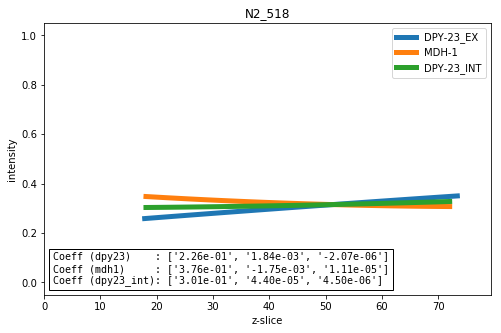

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_519.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_519.csv


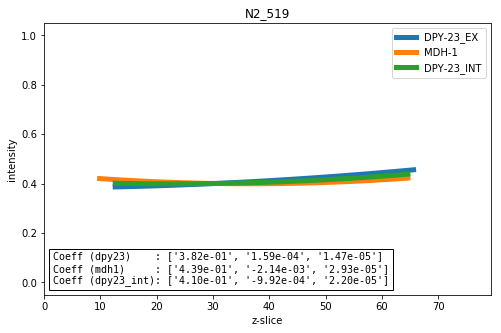

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_520.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_520.csv


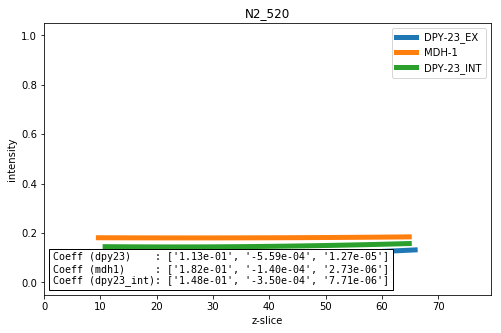

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_521.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_521.csv


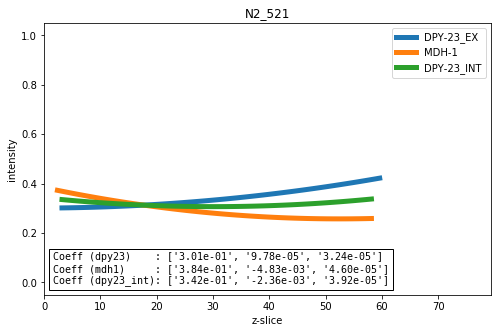

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_522.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_522.csv


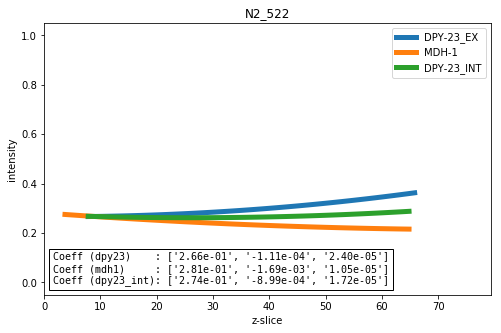

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_523.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_523.csv


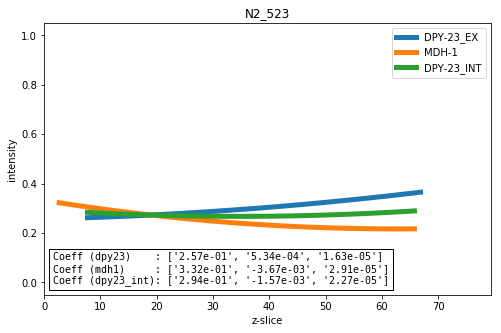

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_524.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_524.csv


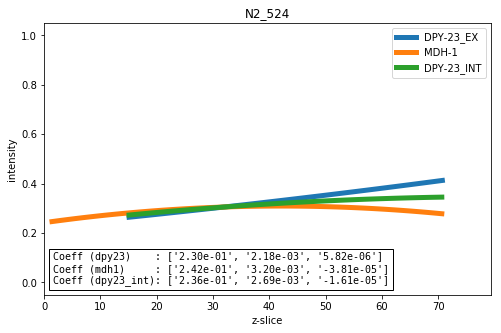

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_525.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_525.csv


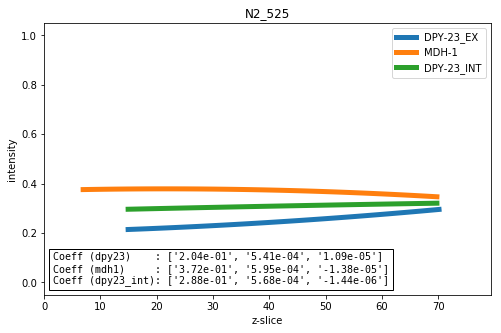

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_526.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_526.csv


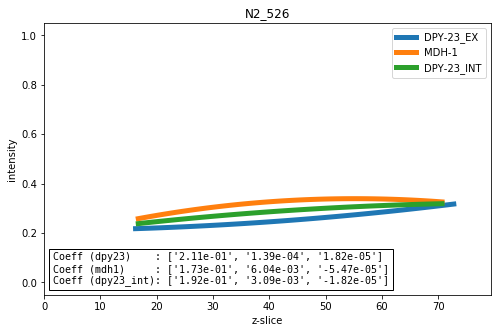

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_527.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_527.csv


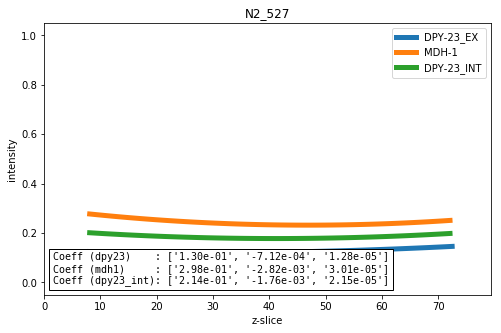

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_528.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_528.csv


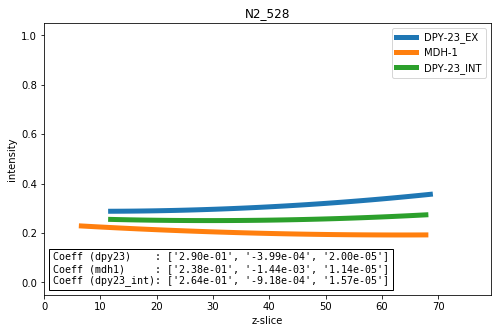

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_529.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_529.csv


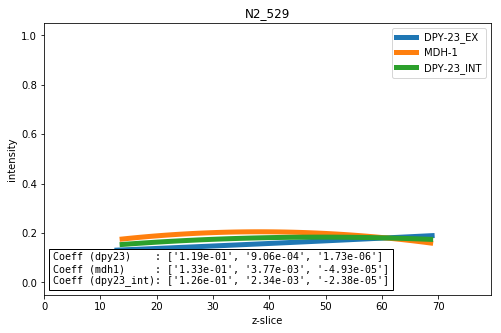

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_530.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_530.csv


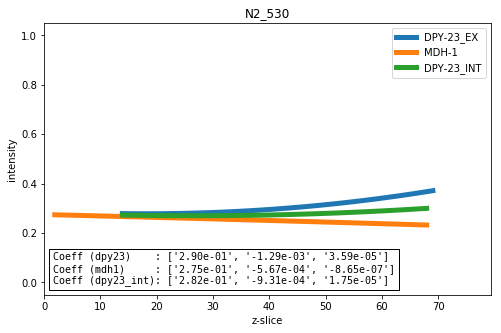

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_531.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_531.csv


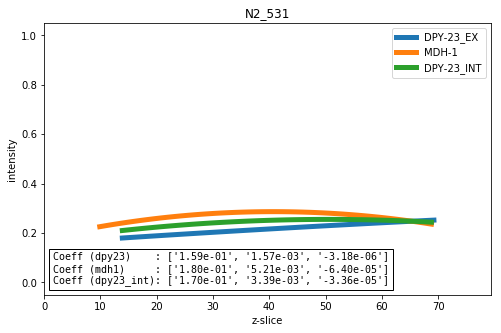

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_532.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_532.csv


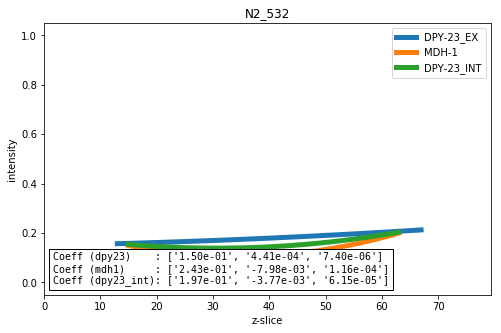

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_533.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_533.csv


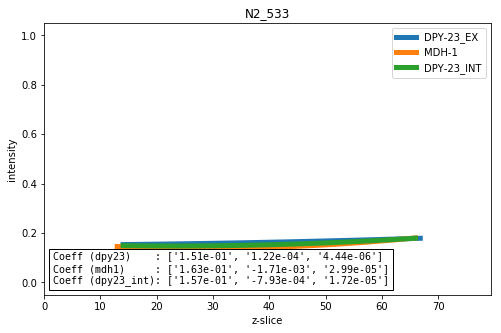

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_535.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_535.csv


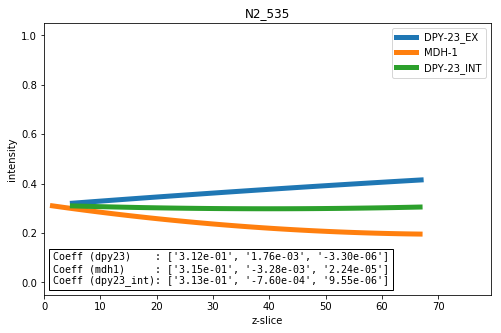

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_536.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_536.csv


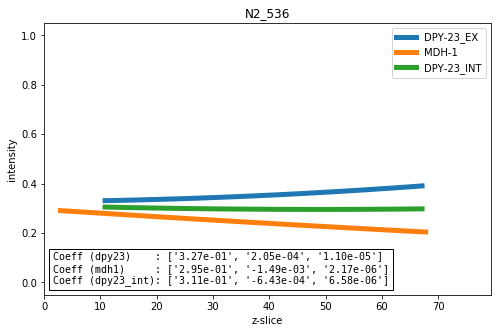

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_537.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_537.csv


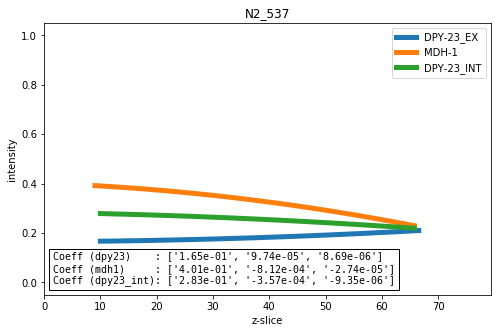

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_538.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_538.csv


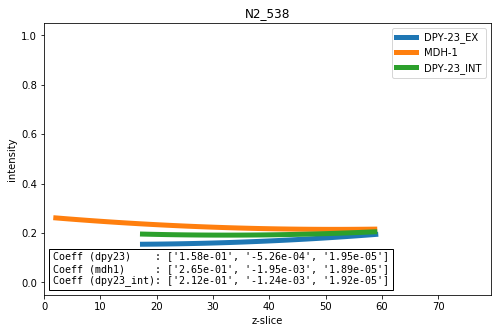

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_539.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_539.csv


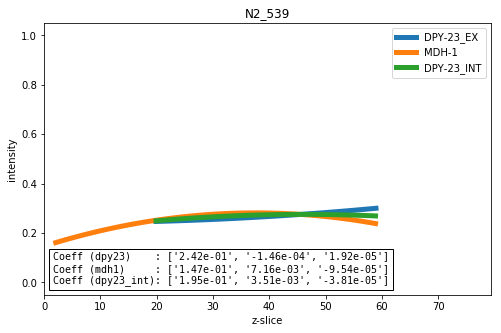

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_540.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_540.csv


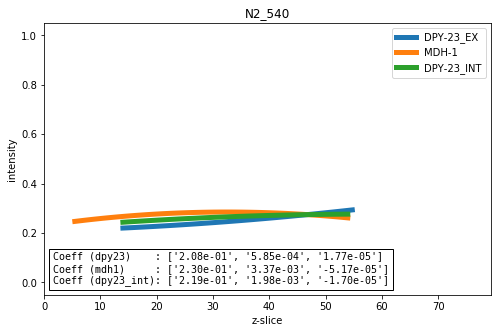

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_541.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_541.csv


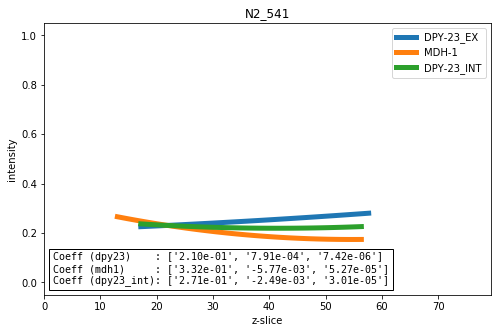

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_542.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_542.csv


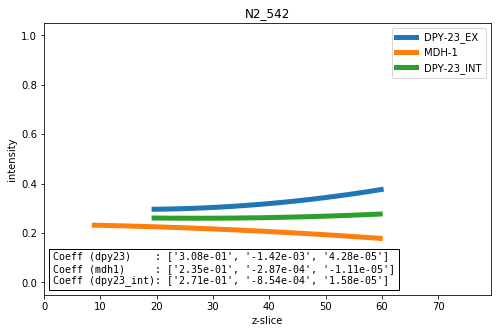

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_543.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_543.csv


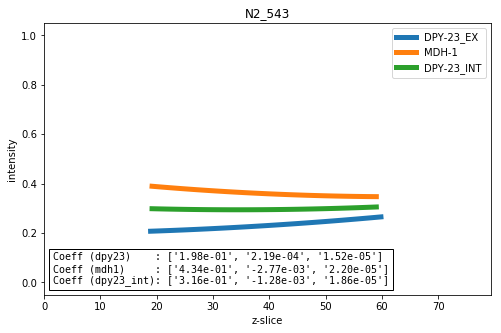

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_544.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_544.csv


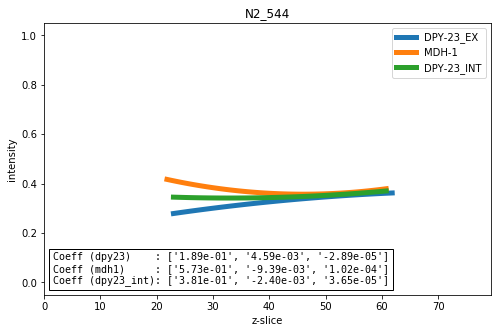

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_545.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_545.csv


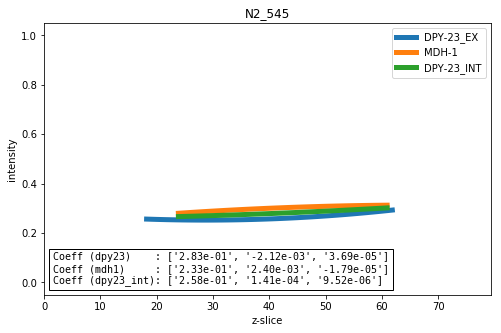

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_546.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_546.csv


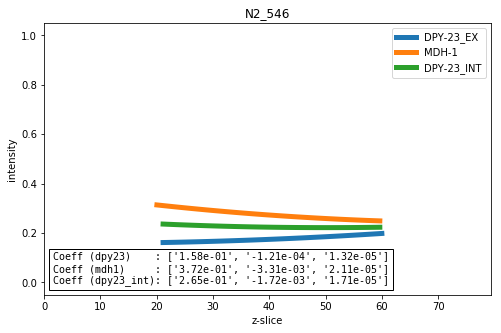

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_547.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_547.csv


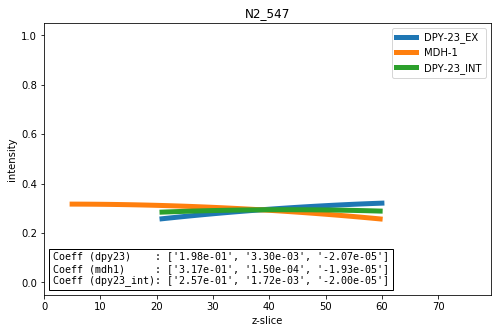

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_548.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_548.csv


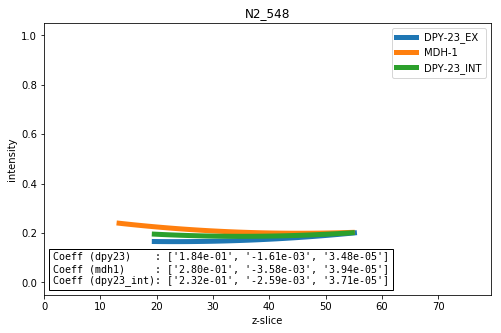

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_549.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_549.csv


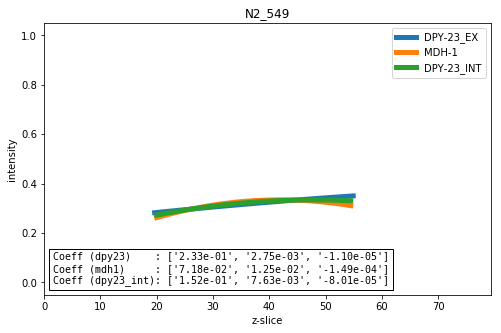

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_550.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_550.csv


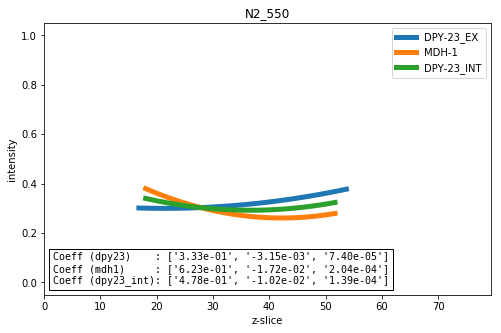

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_551.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_551.csv


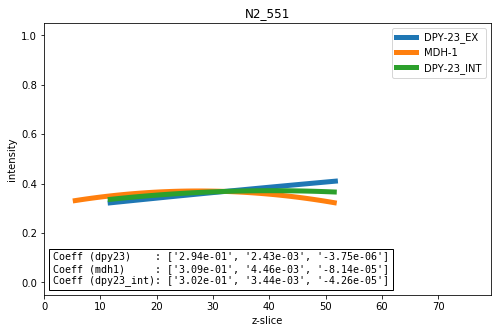

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_552.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_552.csv


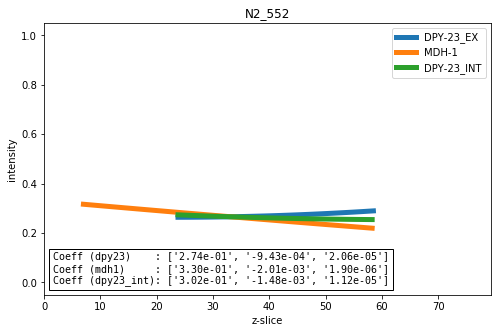

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_553.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_553.csv


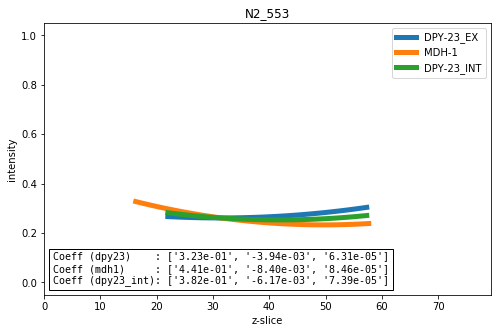

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_554.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_554.csv


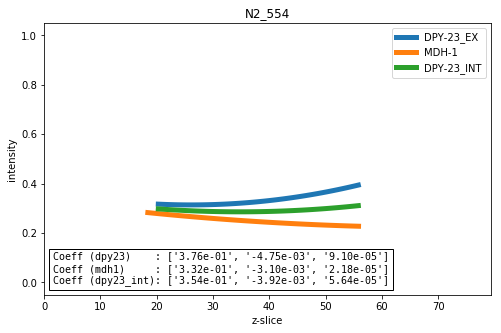

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_555.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_555.csv


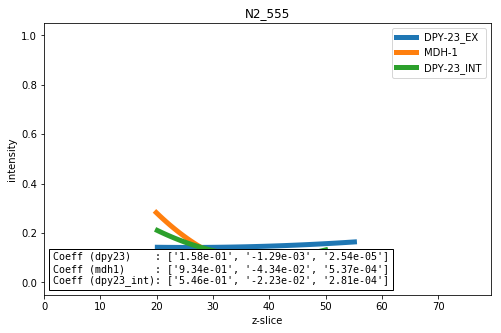

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_556.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_556.csv


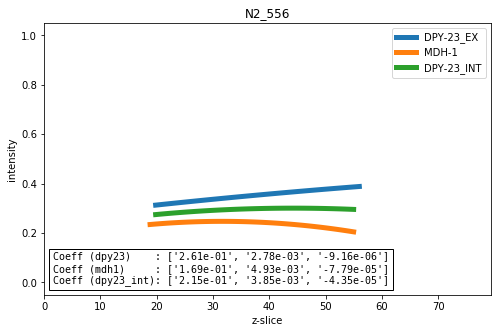

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_557.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_557.csv


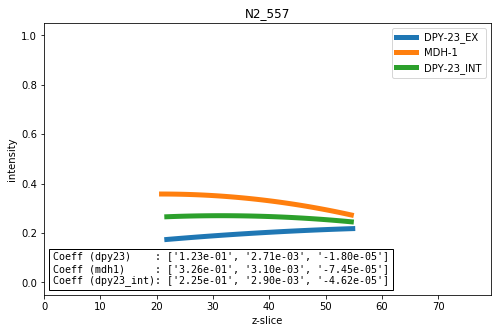

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_558.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_558.csv


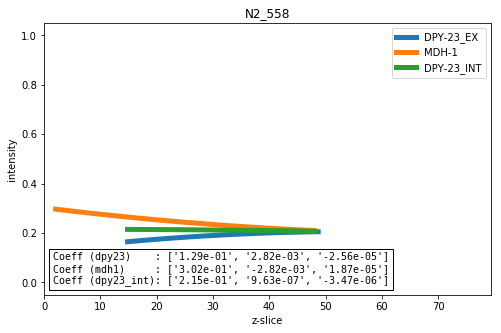

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_559.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_559.csv


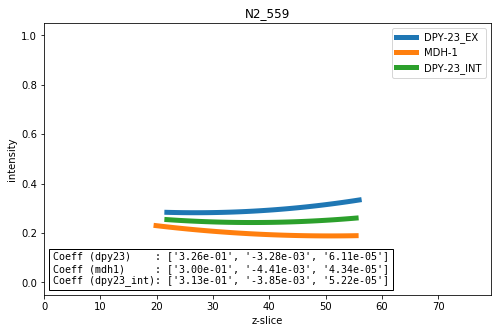

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_560.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_560.csv


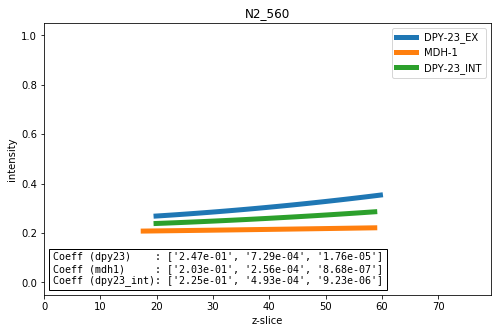

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_561.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_561.csv


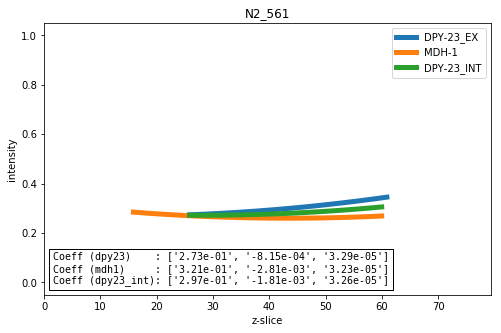

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_562.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_562.csv


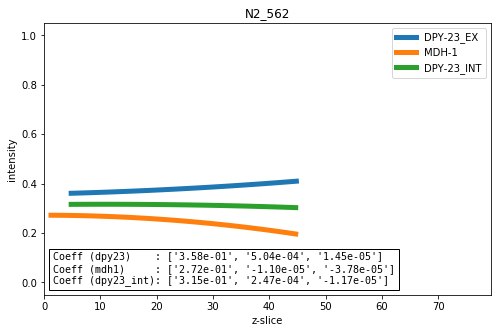

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_563.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_563.csv


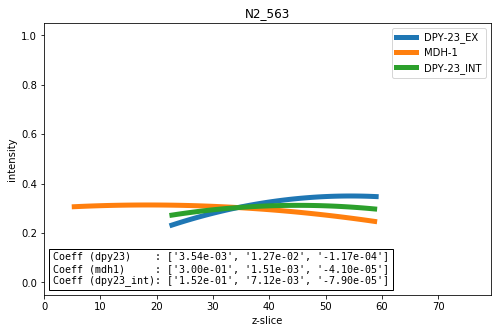

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_564.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_564.csv


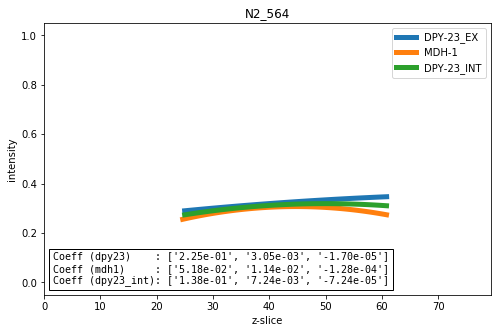

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_565.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_565.csv


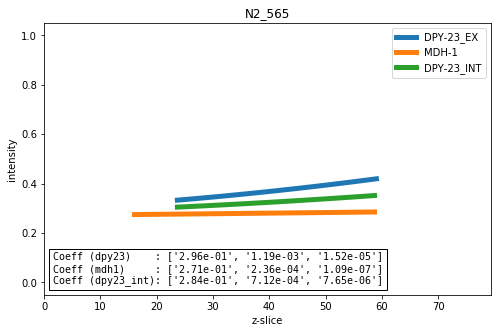

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_566.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_566.csv


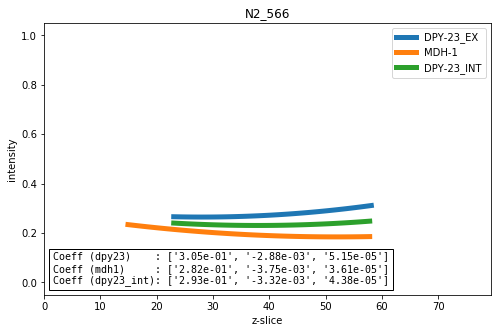

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_567.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_567.csv


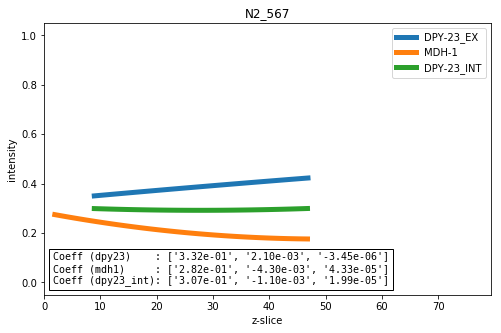

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_568.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_568.csv


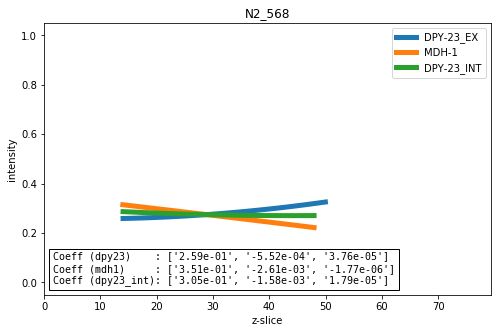

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_569.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_569.csv


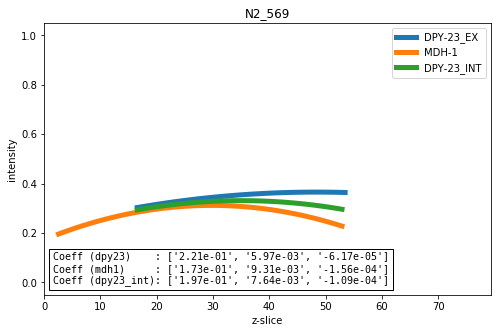

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_570.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_570.csv


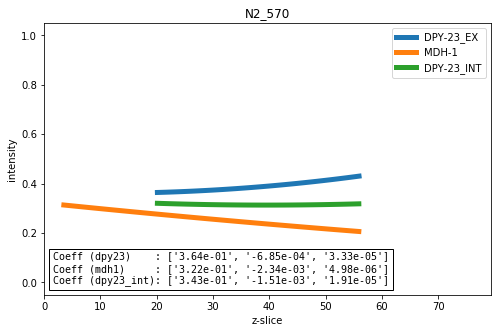

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_571.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_571.csv


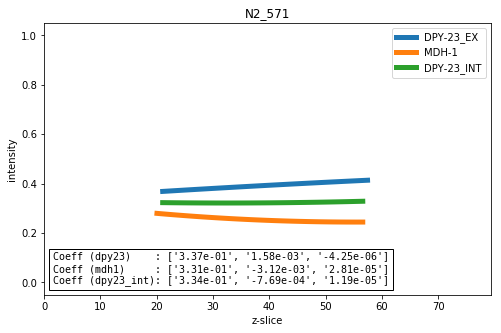

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_572.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_572.csv


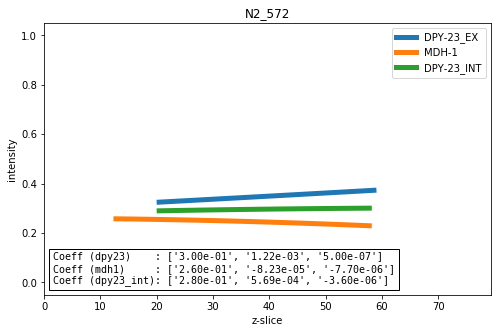

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_573.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_573.csv


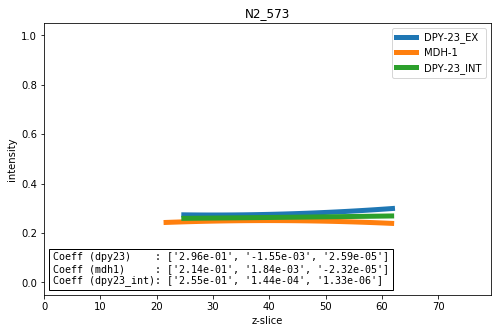

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_574.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_574.csv


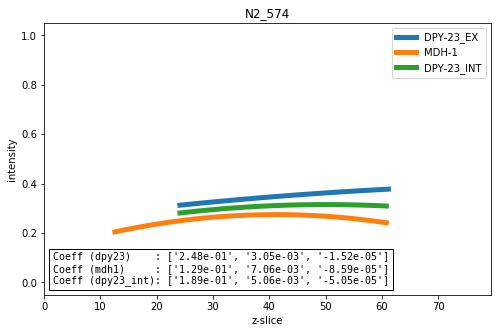

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_575.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_575.csv


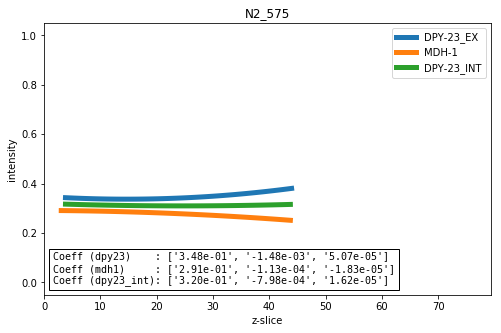

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_576.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_576.csv


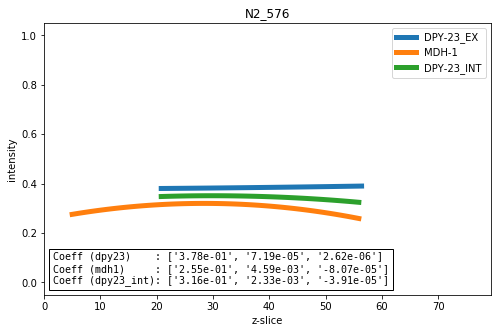

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_578.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_578.csv


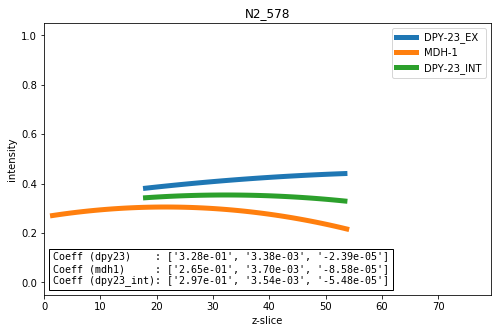

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_579.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_579.csv


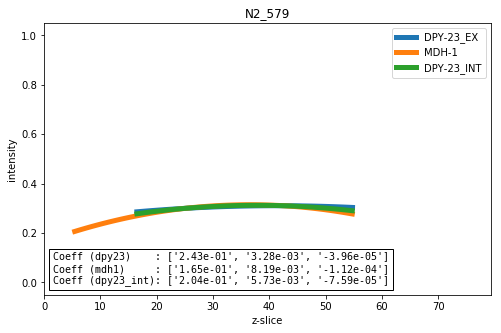

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_580.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_580.csv


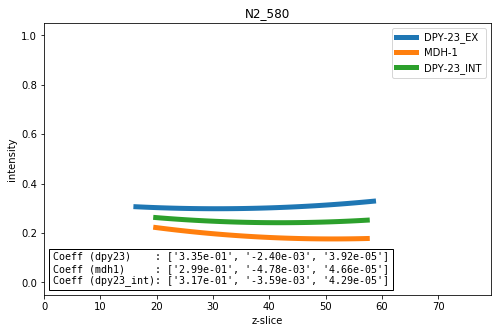

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_581.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_581.csv


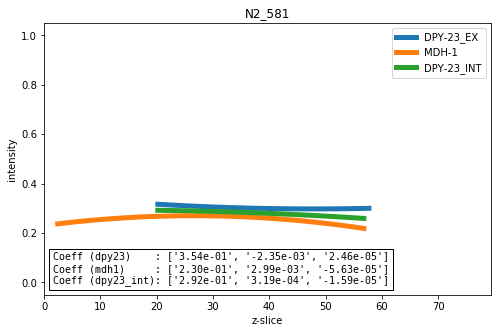

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_582.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_582.csv


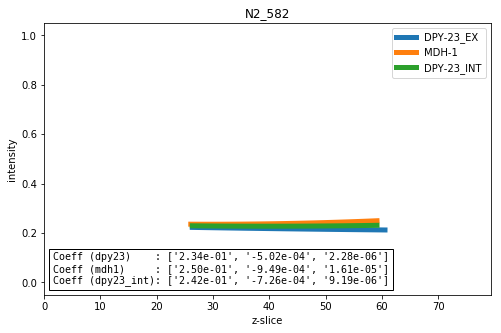

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_583.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_583.csv


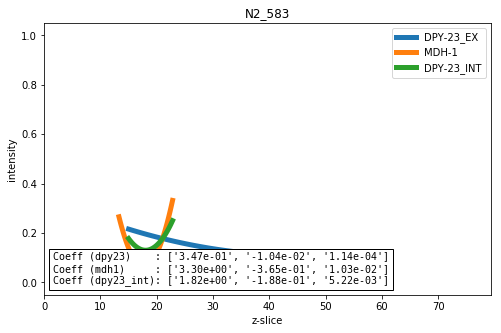

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_584.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_584.csv


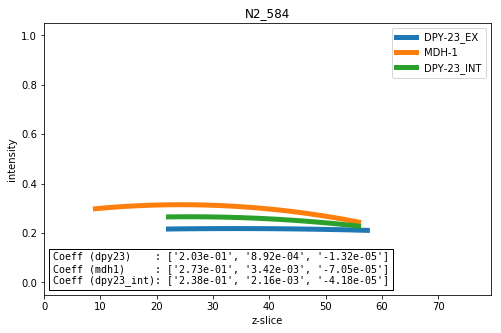

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_585.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_585.csv


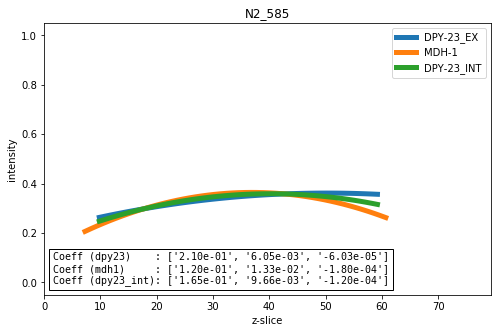

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_586.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_586.csv


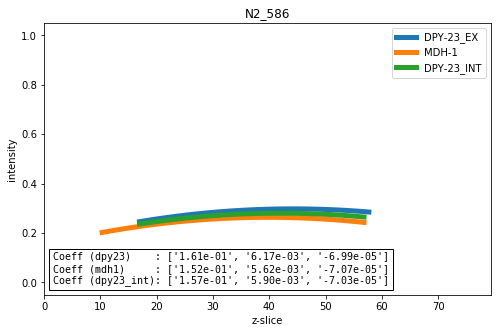

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_588.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_588.csv


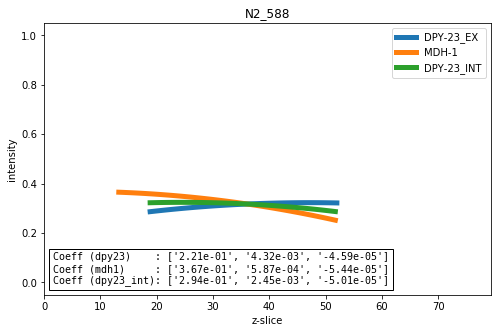

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_589.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_589.csv


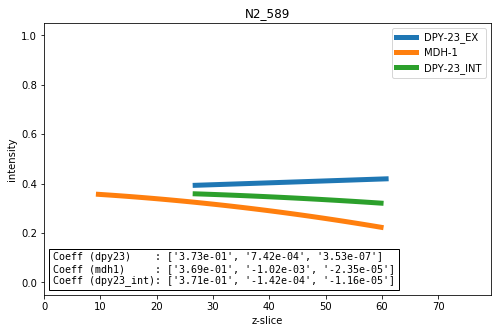

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_590.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_590.csv


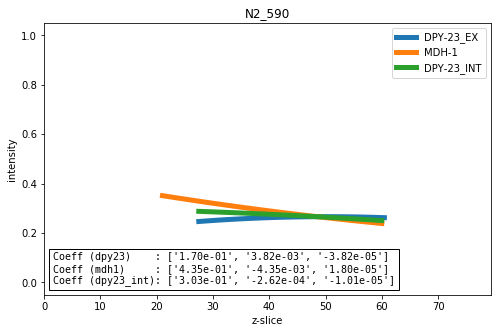

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_591.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_591.csv


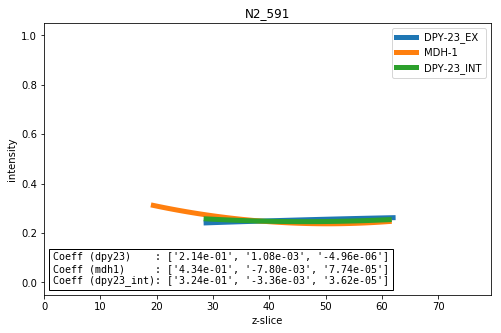

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_592.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_592.csv


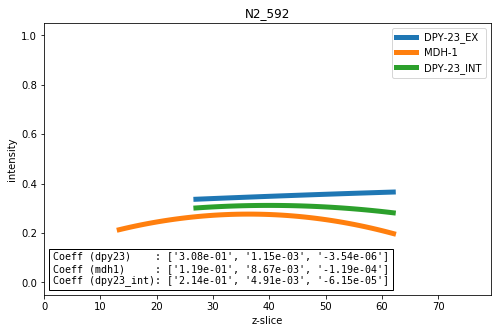

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_593.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_593.csv


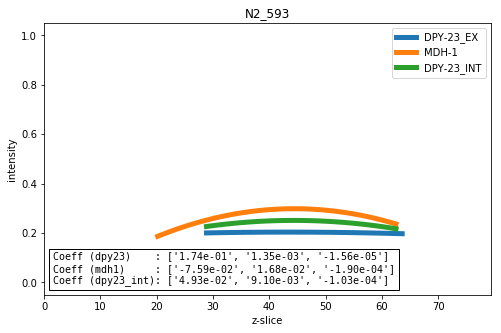

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_594.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_594.csv


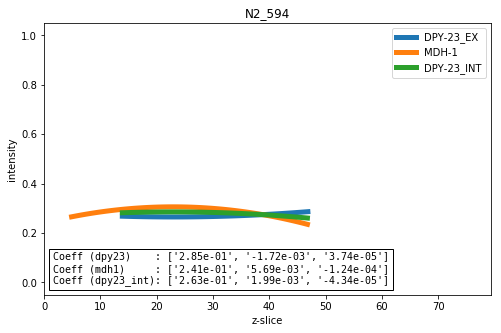

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_595.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_595.csv


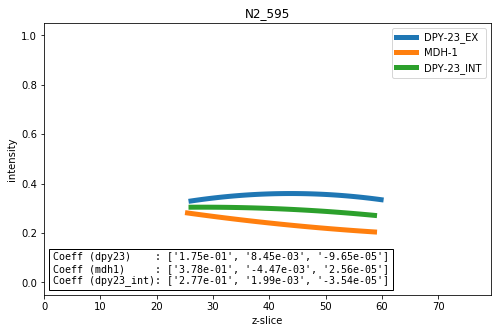

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_596.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_596.csv


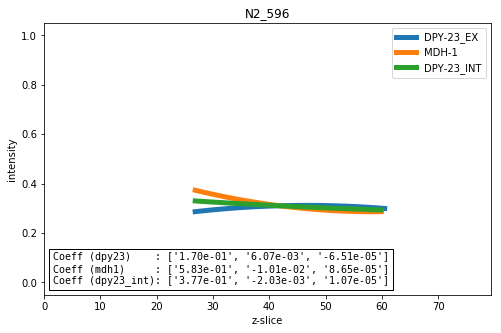

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_597.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_597.csv


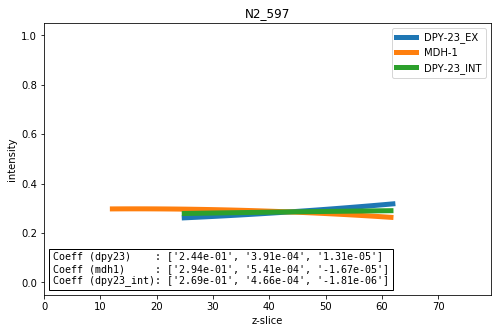

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_598.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_598.csv


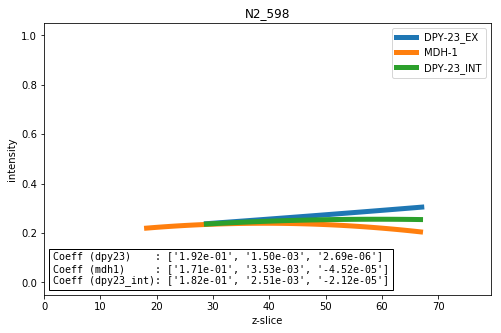

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_599.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_599.csv


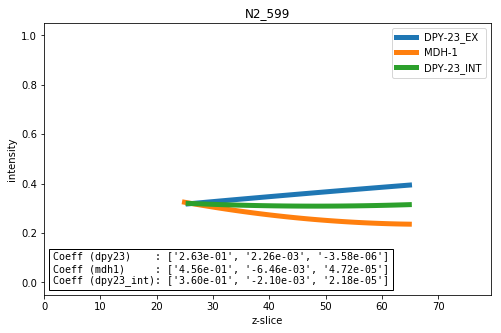

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_600.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_600.csv


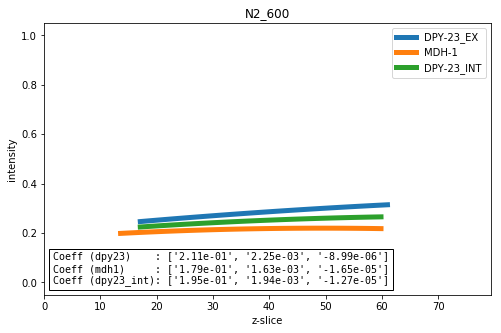

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_603.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_603.csv


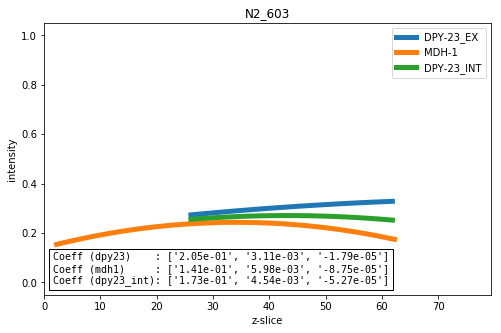

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_605.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_605.csv


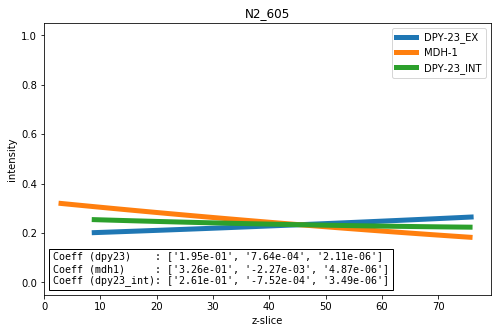

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_606.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_606.csv


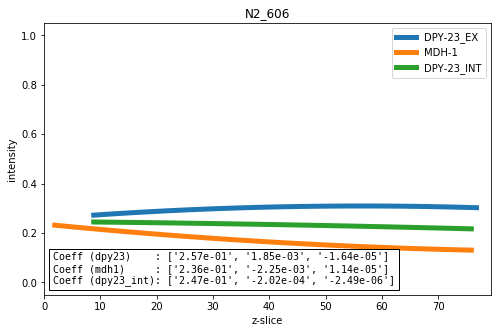

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_607.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_607.csv


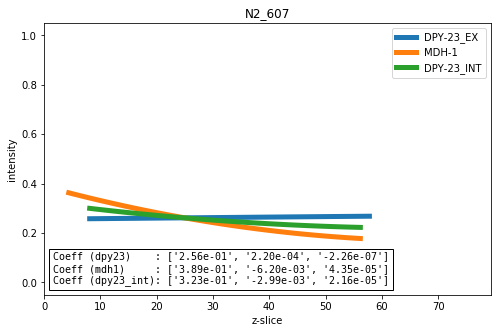

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_608.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_608.csv


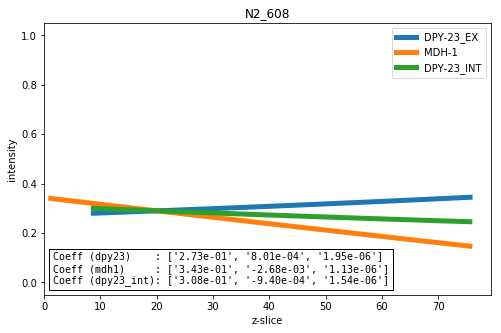

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_609.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_609.csv


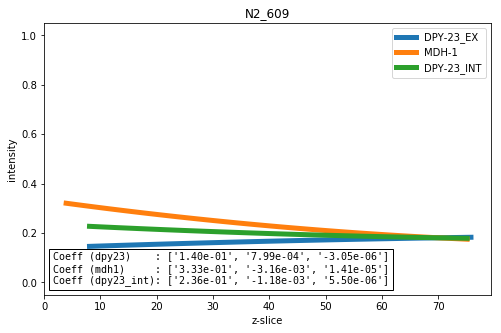

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_614.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_614.csv


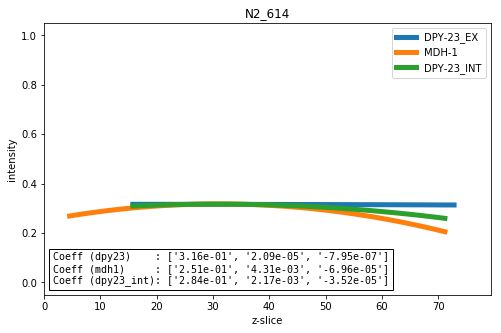

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_615.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_615.csv


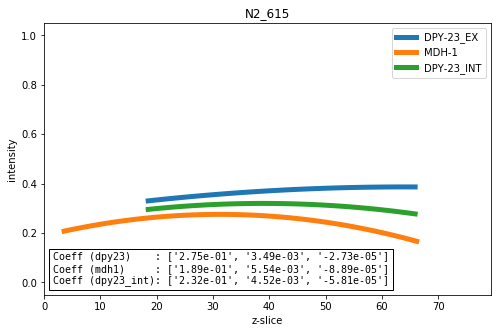

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_616.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_616.csv


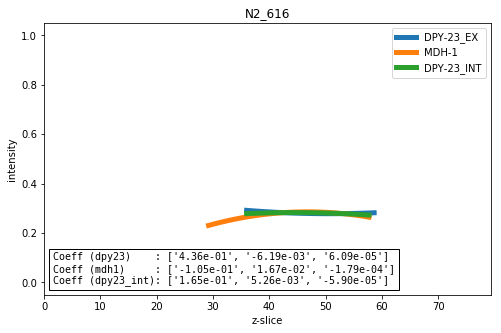

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_617.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_617.csv


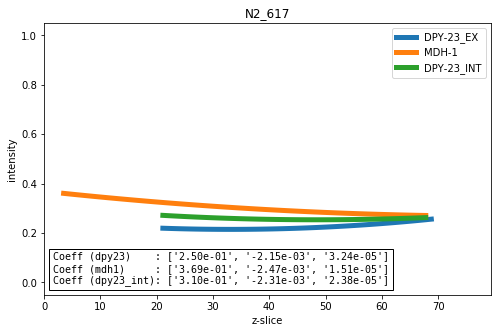

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_618.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_618.csv


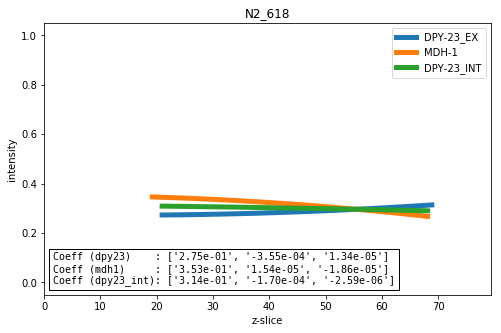

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_619.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_619.csv


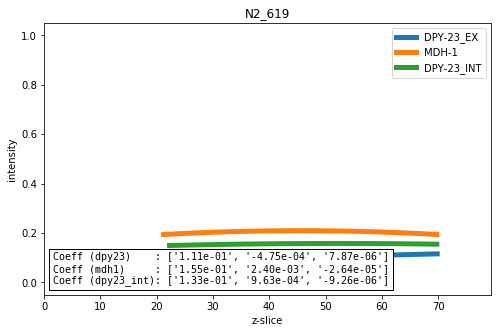

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_620.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_620.csv


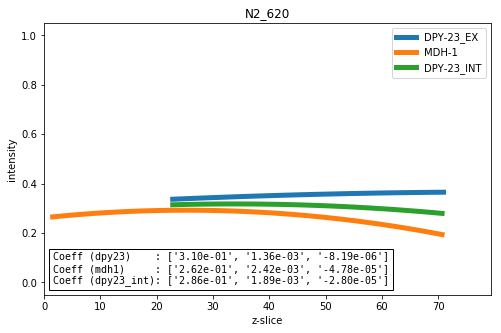

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_621.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_621.csv


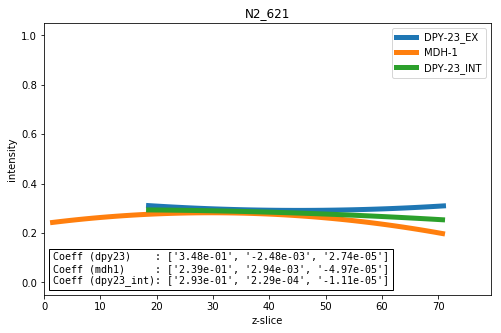

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_623.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_623.csv


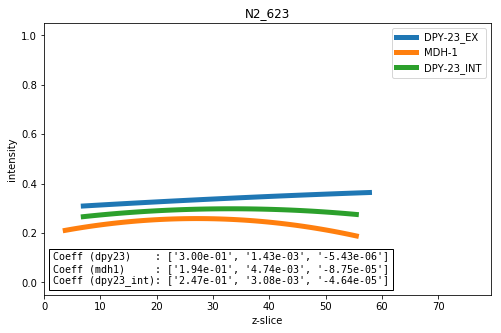

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_625.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_625.csv


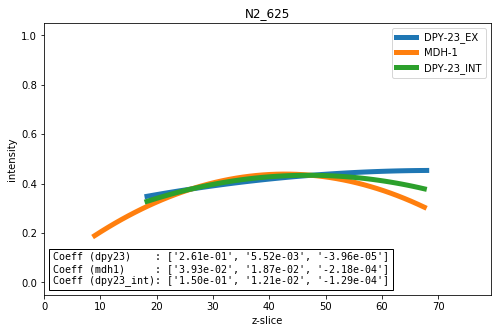

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_626.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_626.csv


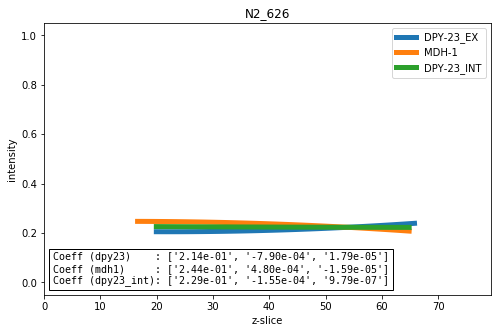

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_627.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_627.csv


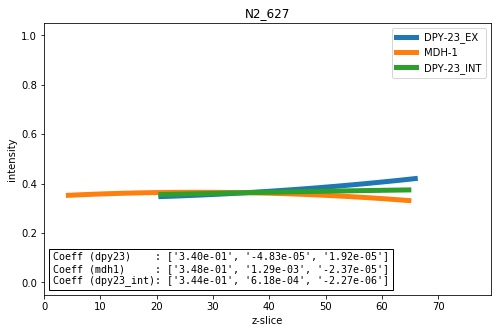

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_628.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_628.csv


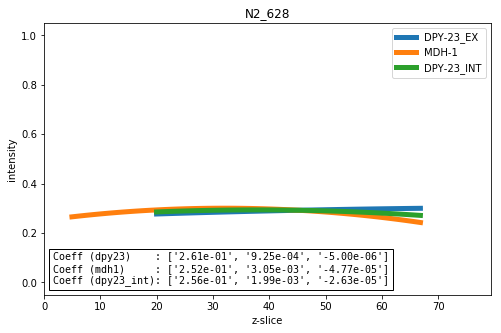

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_629.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_629.csv


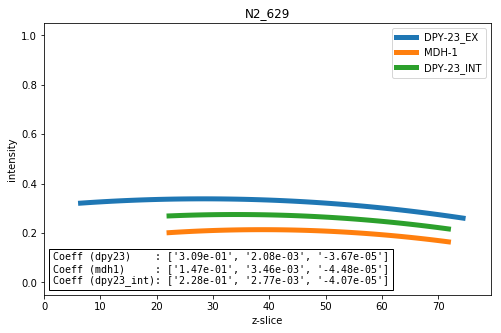

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_630.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_630.csv


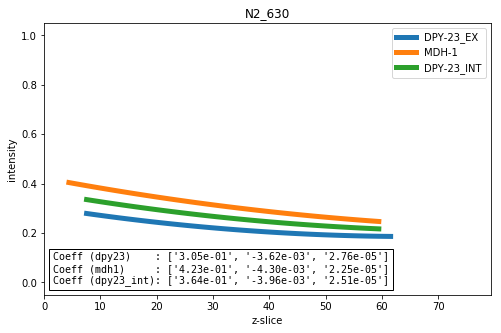

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_631.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_631.csv


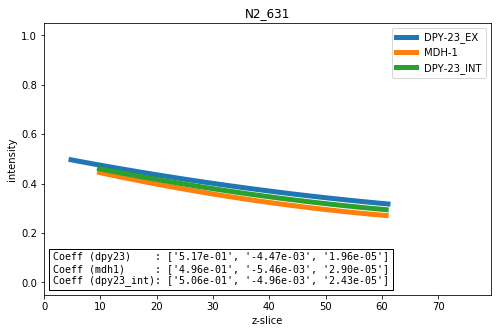

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_632.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_632.csv


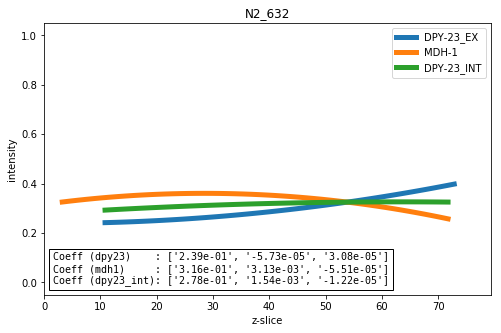

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_633.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_633.csv


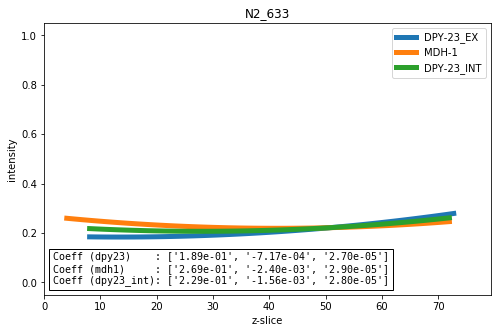

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_634.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_634.csv


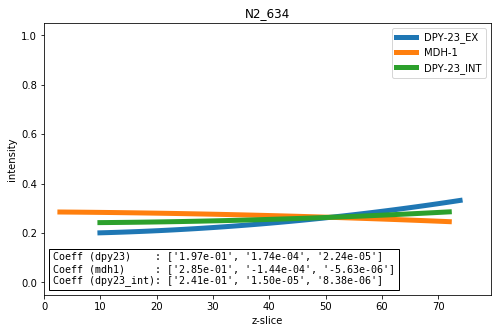

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_635.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_635.csv


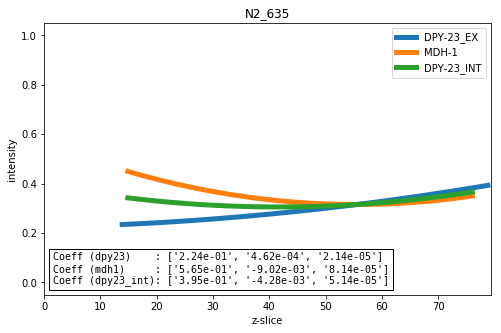

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_636.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_636.csv


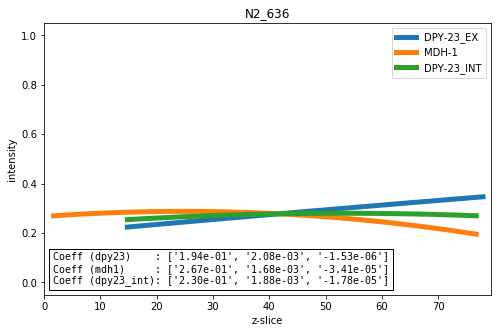

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_637.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_637.csv


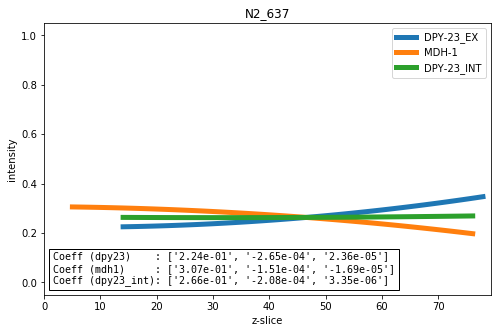

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_638.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_638.csv


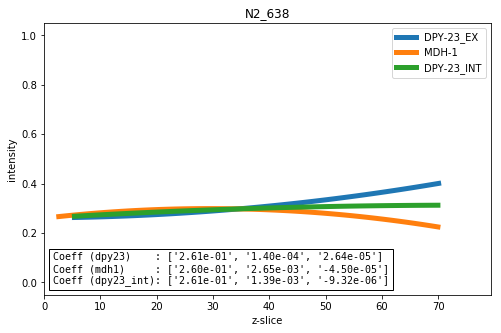

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_639.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_639.csv


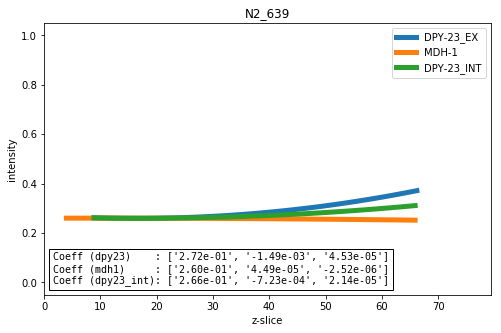

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_640.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_640.csv


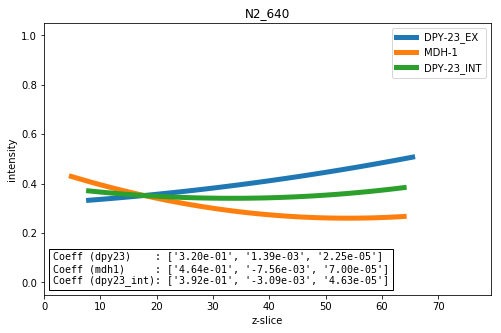

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_641.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_641.csv


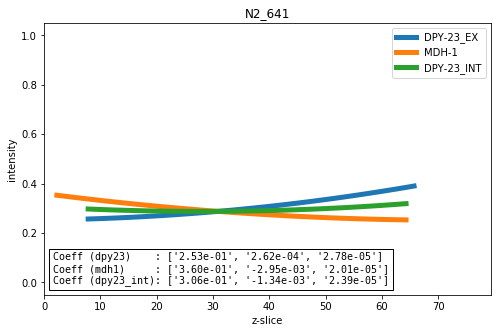

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_642.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_642.csv


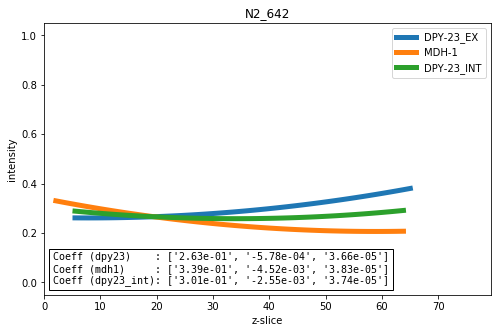

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_643.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_643.csv


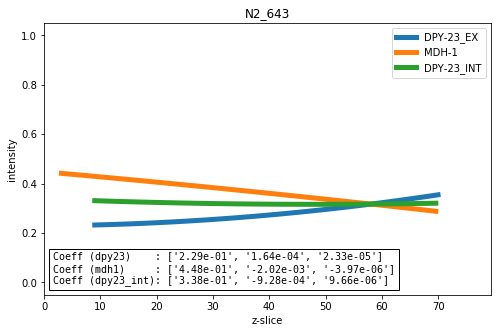

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_644.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_644.csv


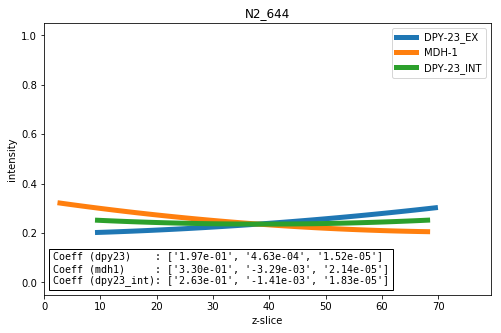

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_645.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_645.csv


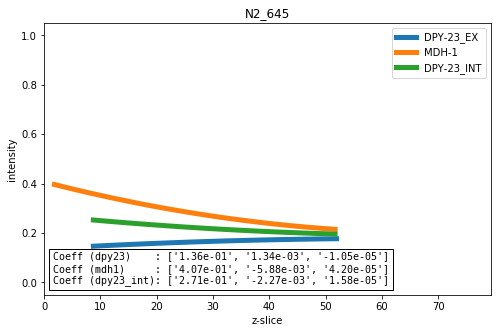

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_646.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_646.csv


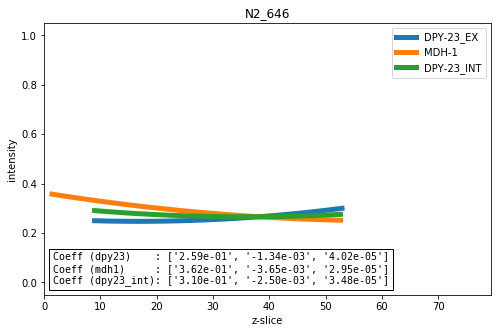

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_647.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_647.csv


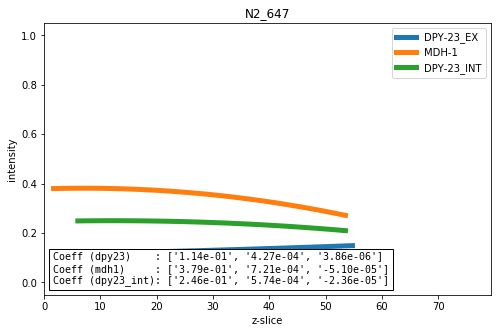

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_648.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_648.csv


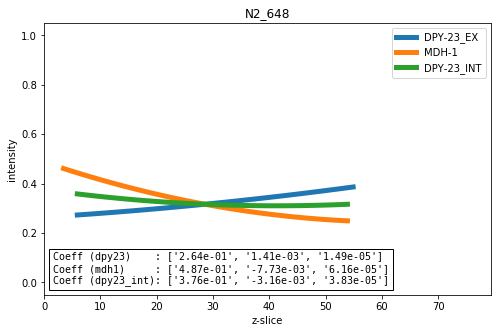

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_649.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_649.csv


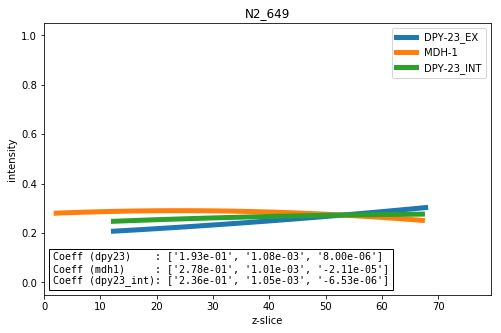

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_650.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_650.csv


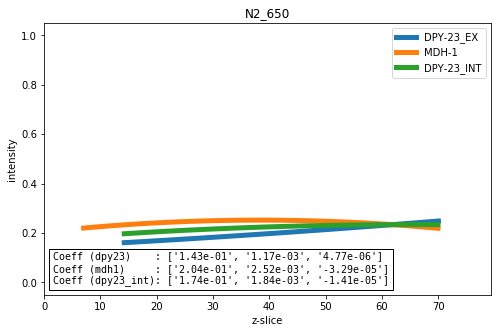

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_651.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_651.csv


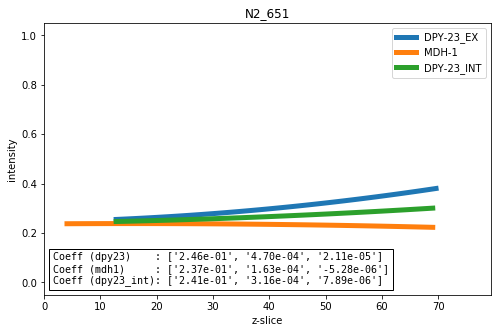

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_652.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_652.csv


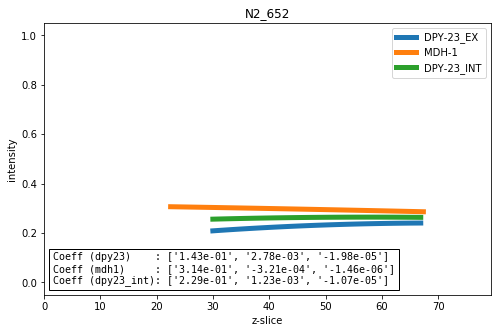

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_653.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_653.csv


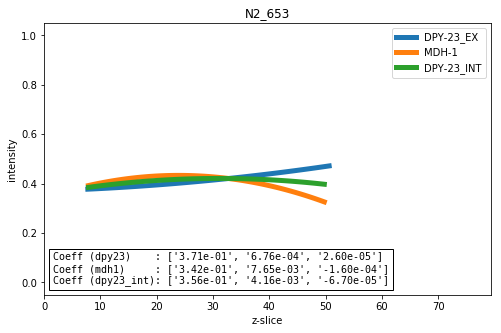

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_654.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_654.csv


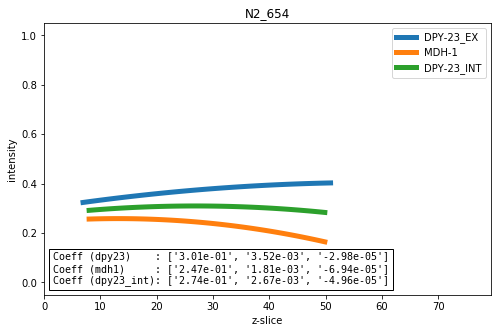

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_655.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_655.csv


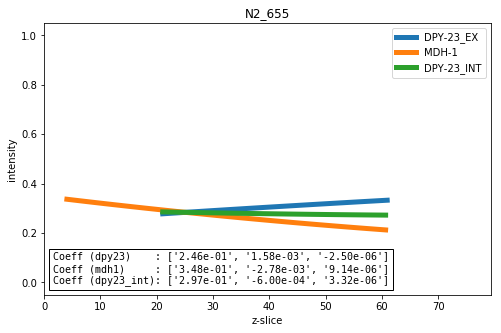

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_656.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_656.csv


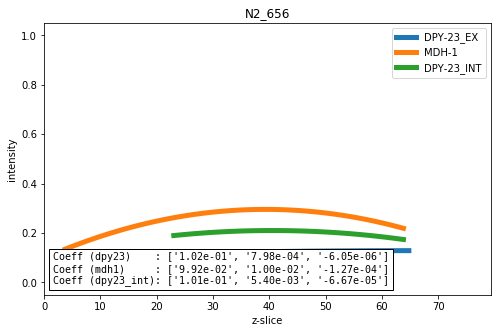

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_657.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_657.csv


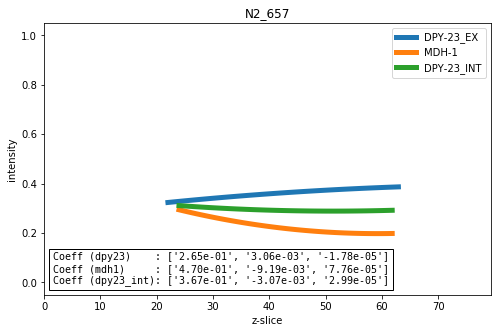

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_658.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_658.csv


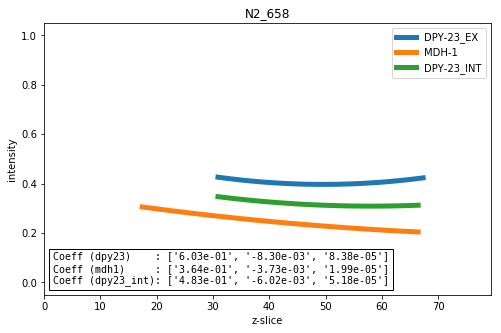

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_660.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_660.csv


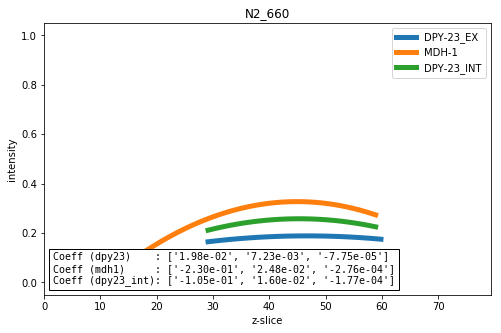

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_661.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_661.csv


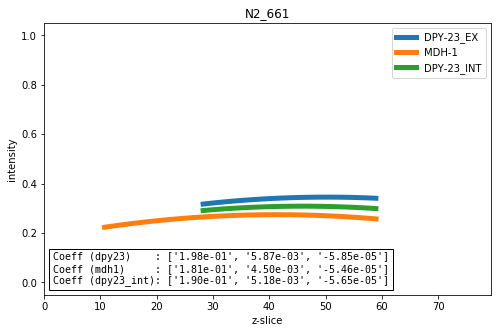

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_662.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_662.csv


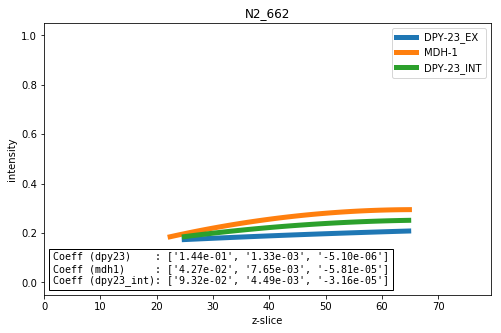

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_663.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_663.csv


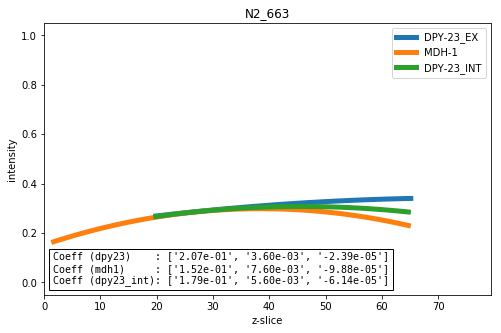

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_664.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_664.csv


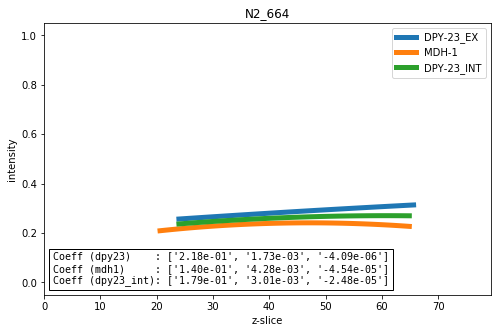

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_665.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_665.csv


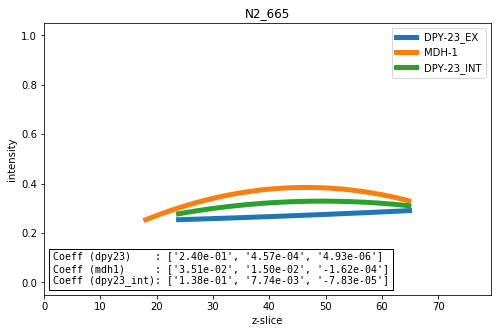

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_666.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_666.csv


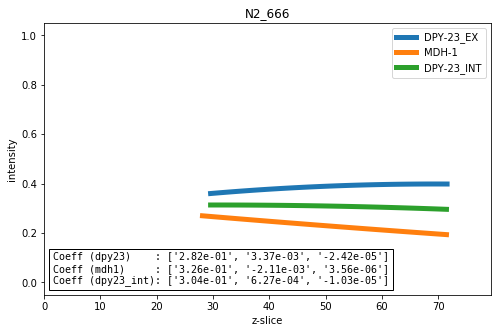

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_667.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_667.csv


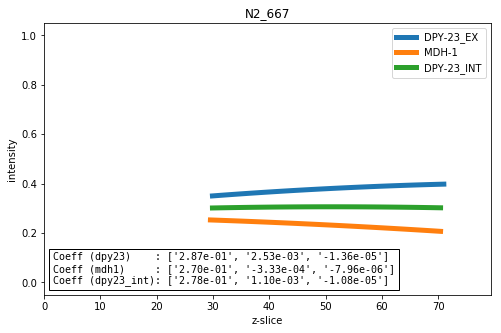

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_668.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_668.csv


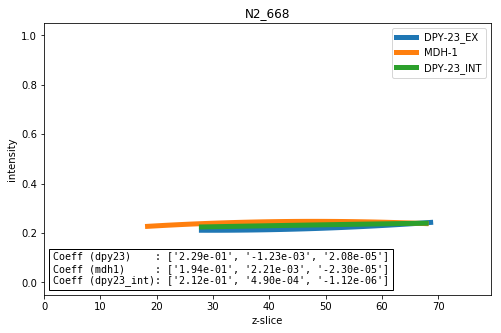

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_669.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_669.csv


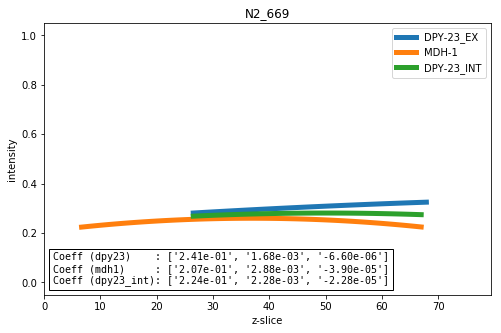

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_670.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_670.csv


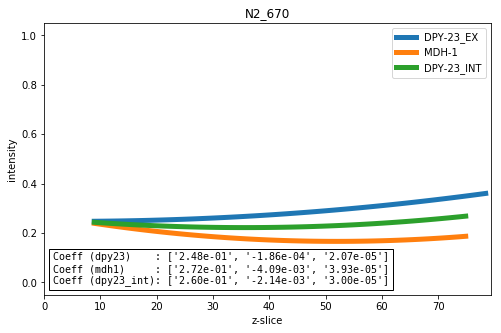

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_671.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_671.csv


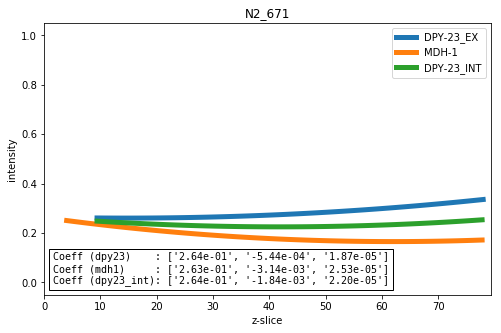

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_672.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_672.csv


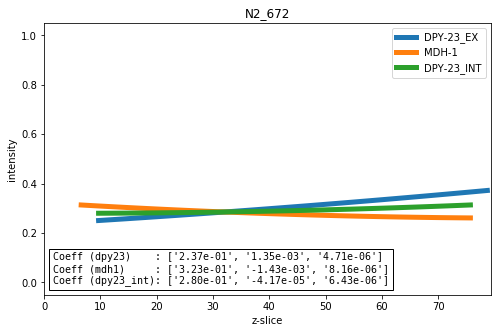

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_673.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_673.csv


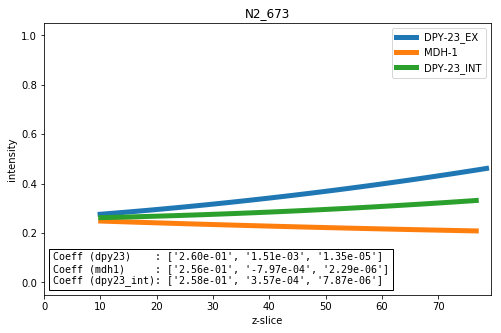

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_674.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_674.csv


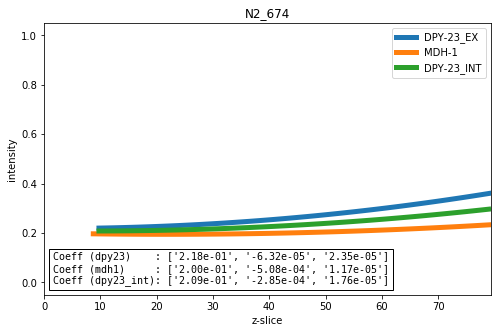

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_675.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_675.csv


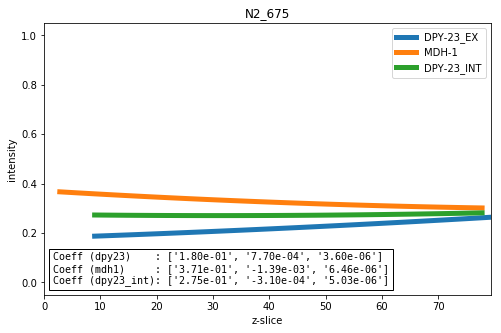

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_676.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_676.csv


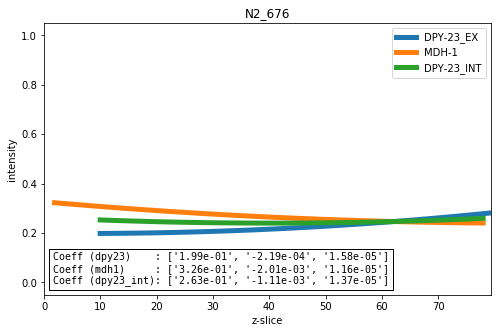

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_677.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_677.csv


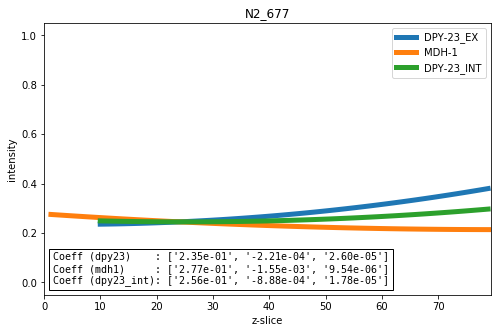

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_678.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_678.csv


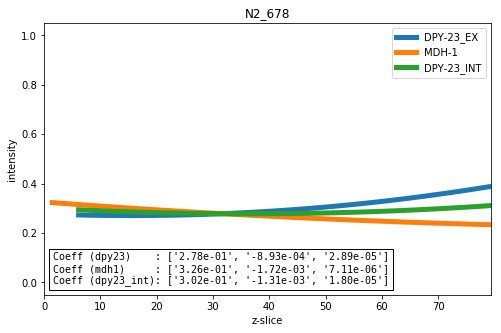

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_679.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_679.csv


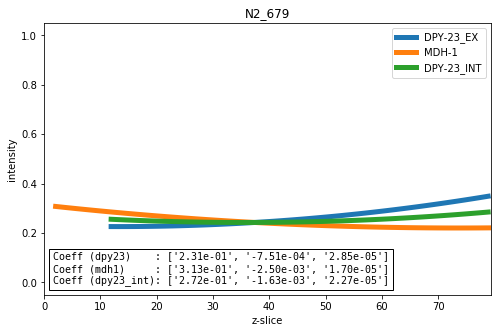

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_680.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_680.csv


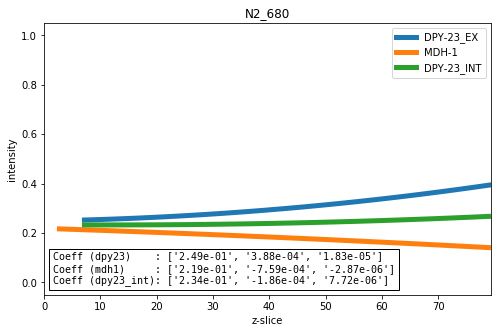

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_681.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_681.csv


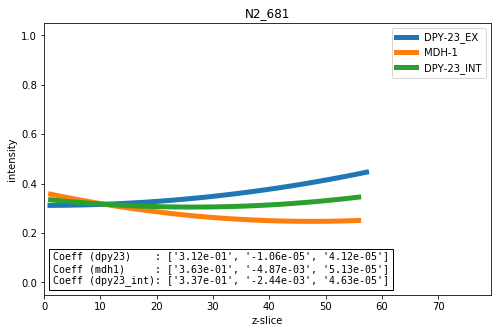

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_682.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_682.csv


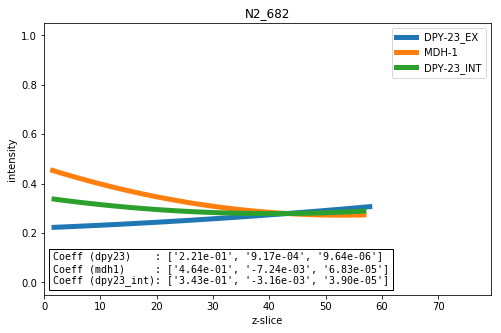

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_683.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_683.csv


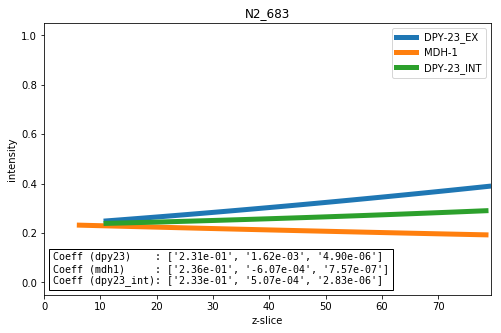

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_684.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_684.csv


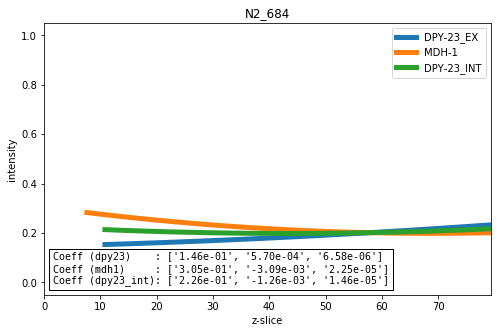

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_686.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_686.csv


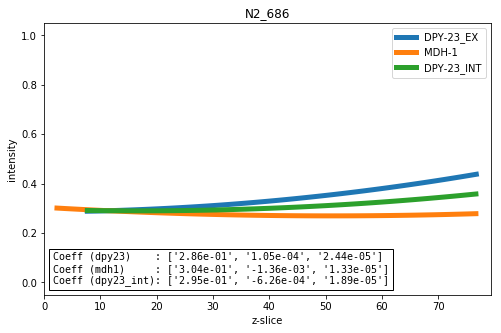

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_687.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_687.csv


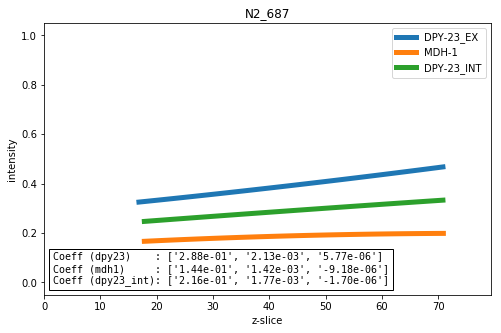

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_688.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_688.csv


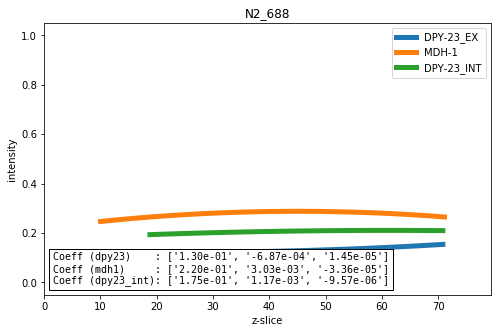

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_689.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_689.csv


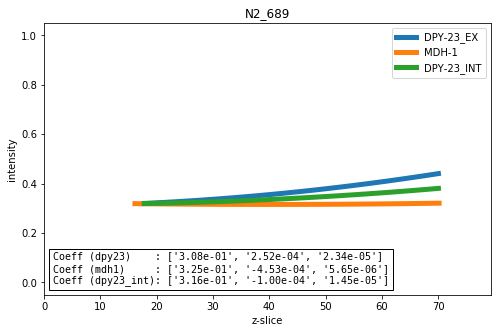

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_690.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_690.csv


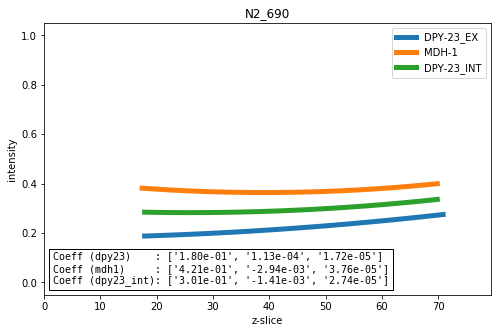

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_691.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_691.csv


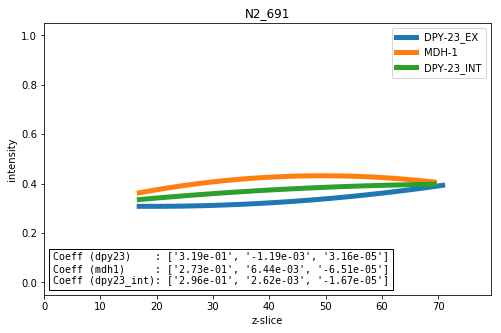

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_692.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_692.csv


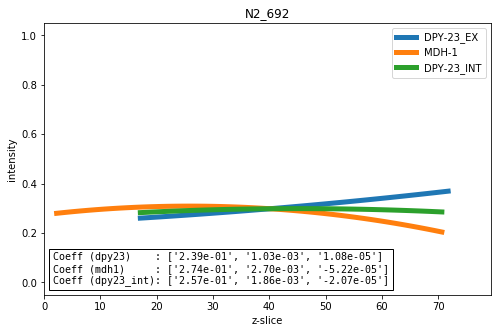

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_693.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_693.csv


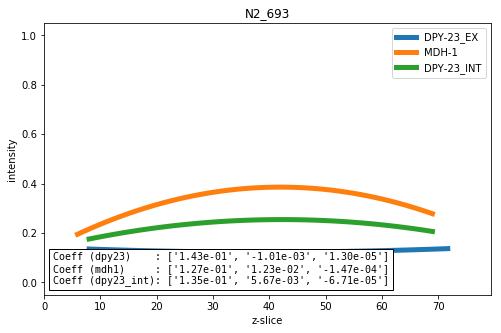

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_694.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_694.csv


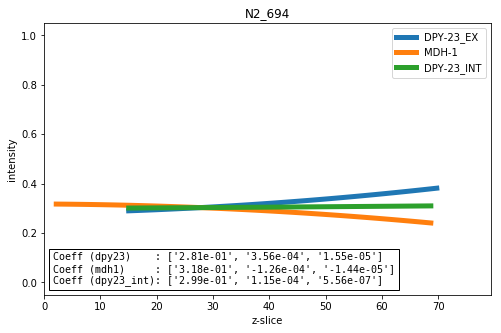

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_695.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_695.csv


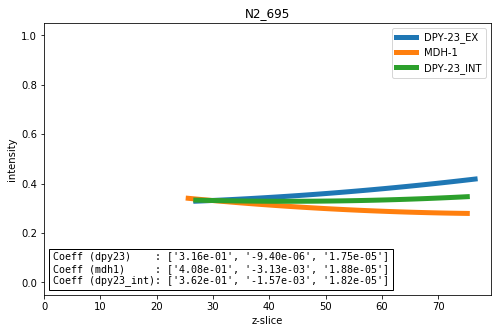

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_696.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_696.csv


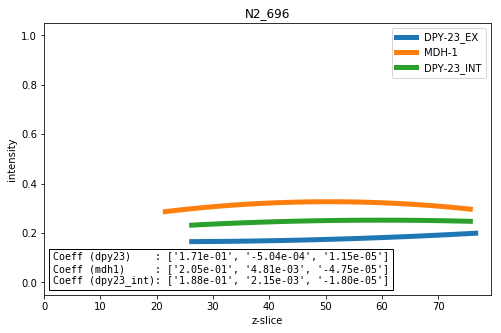

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_697.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_697.csv


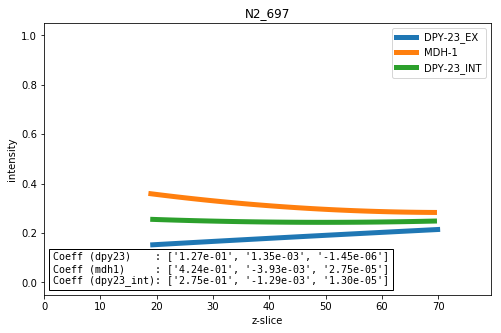

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_698.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_698.csv


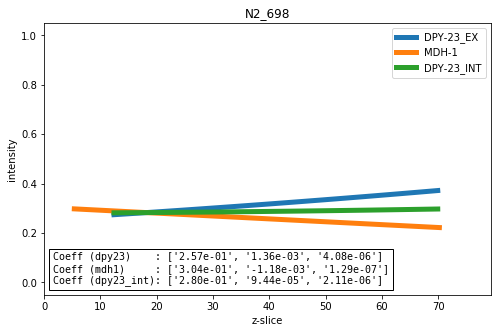

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_699.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_699.csv


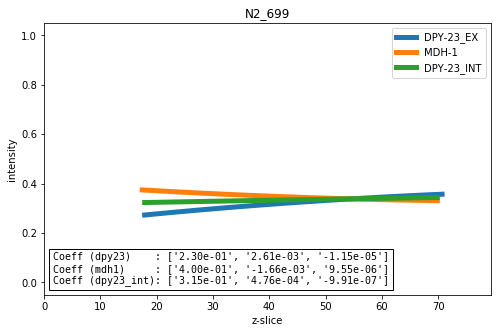

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_700.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_700.csv


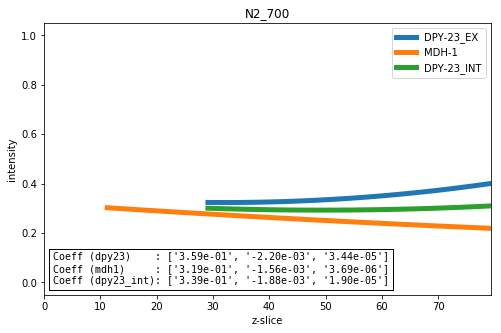

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_701.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_701.csv


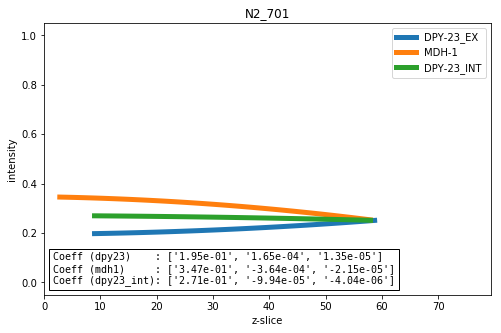

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_702.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_702.csv


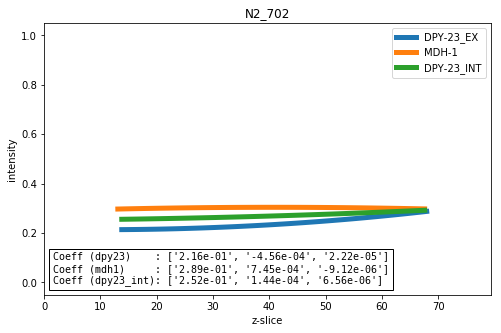

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_703.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_703.csv


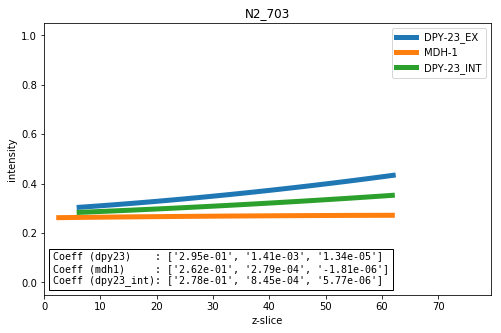

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_704.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_704.csv


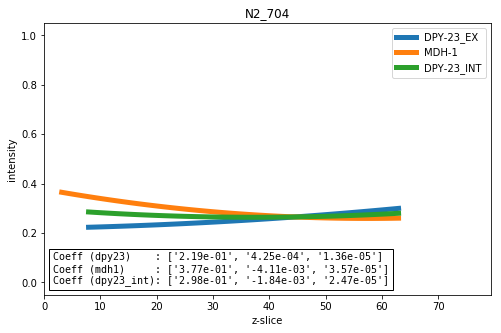

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_705.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_705.csv


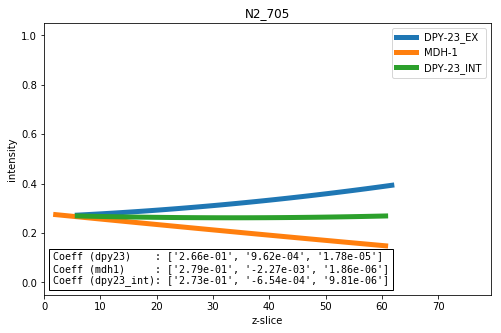

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_706.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_706.csv


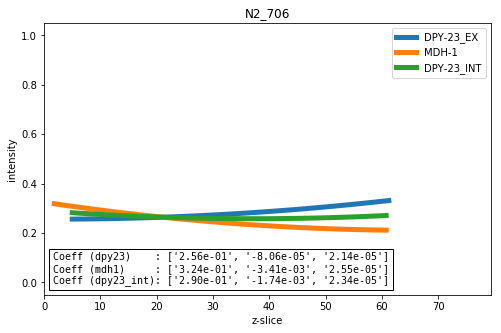

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_707.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_707.csv


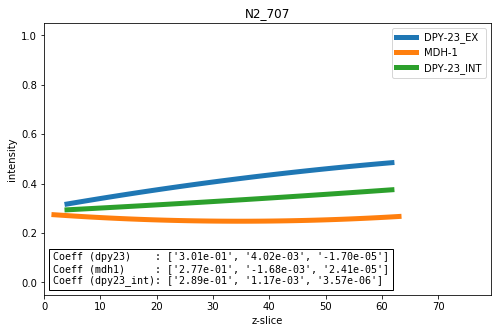

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_708.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_708.csv


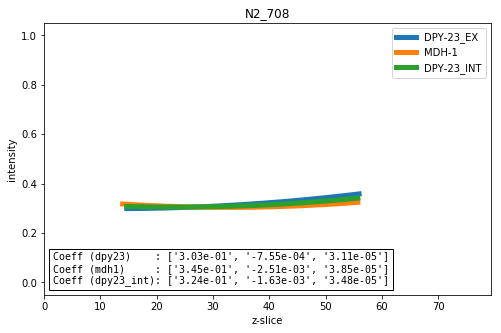

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_709.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_709.csv


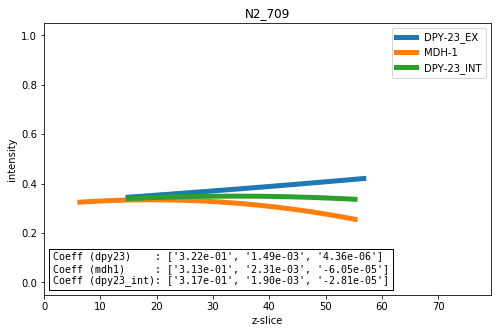

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_710.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_710.csv


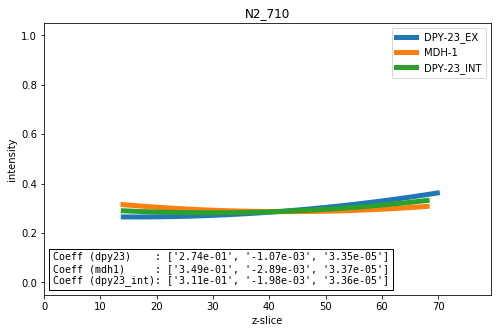

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_711.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_711.csv


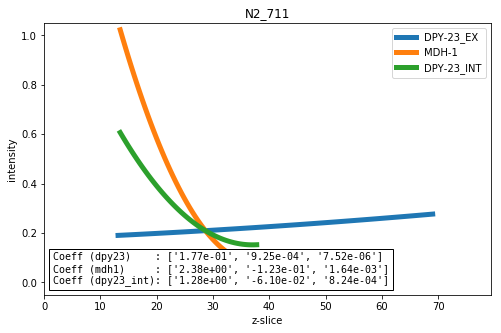

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_712.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_712.csv


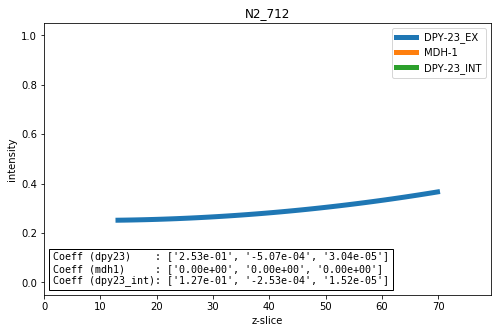

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_713.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_713.csv


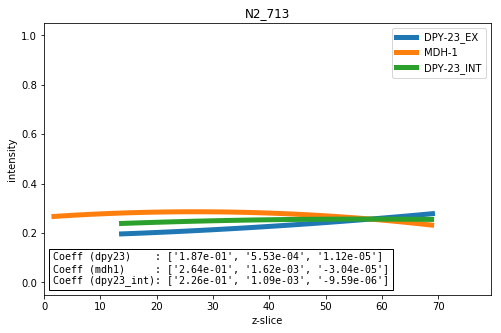

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_714.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_714.csv


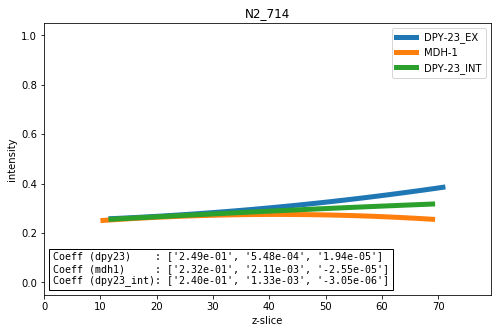

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_715.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_715.csv


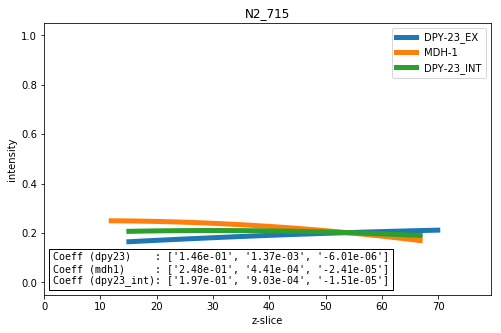

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_716.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_716.csv


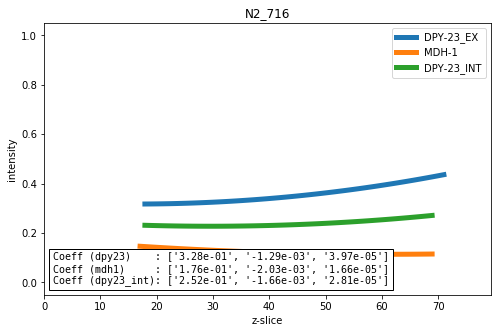

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_717.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_717.csv


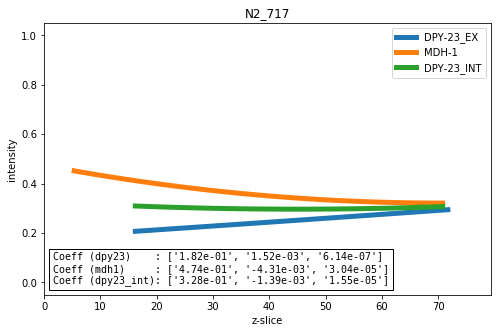

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_719.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_719.csv


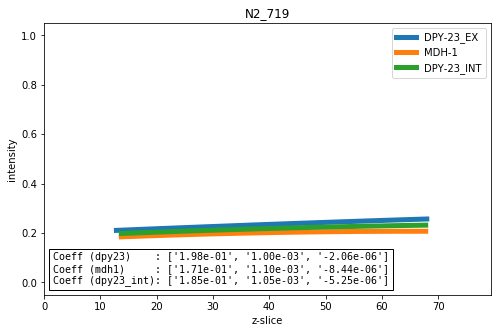

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_720.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_720.csv


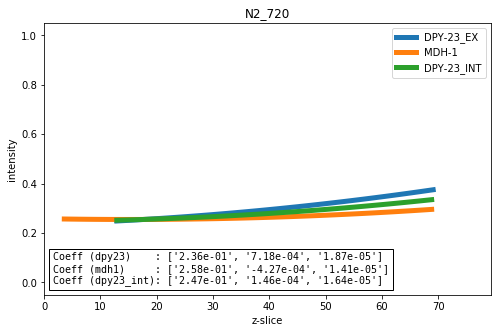

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_721.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_721.csv


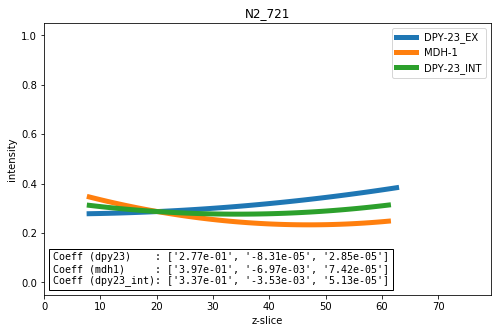

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_722.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_722.csv


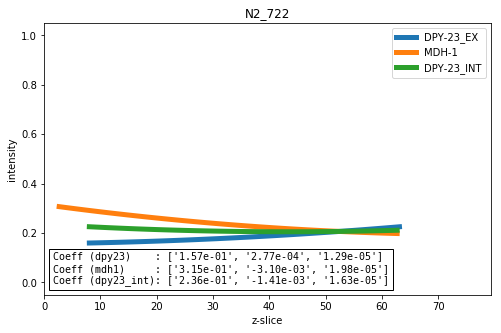

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_724.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_724.csv


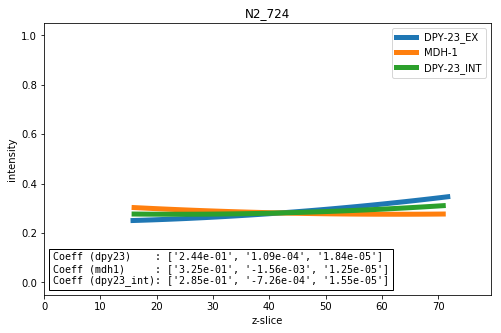

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_725.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_725.csv


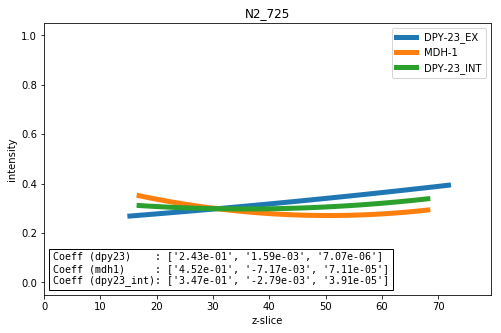

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_726.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_726.csv


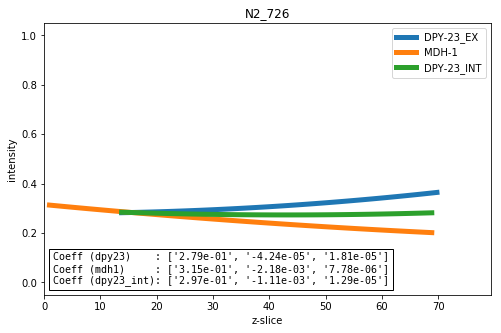

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_727.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_727.csv


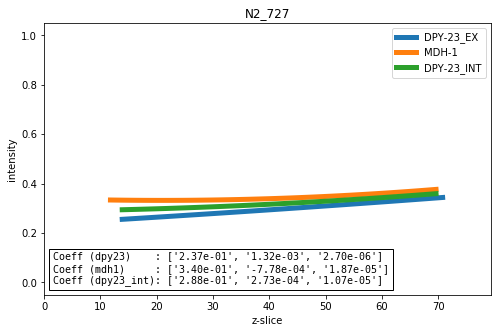

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_728.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_728.csv


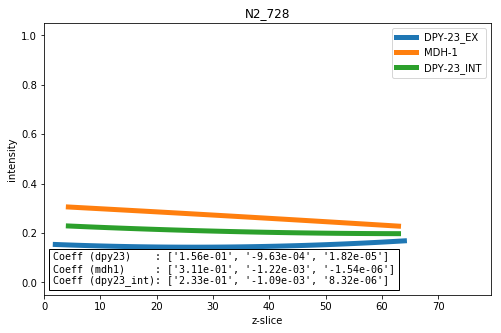

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_729.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_729.csv


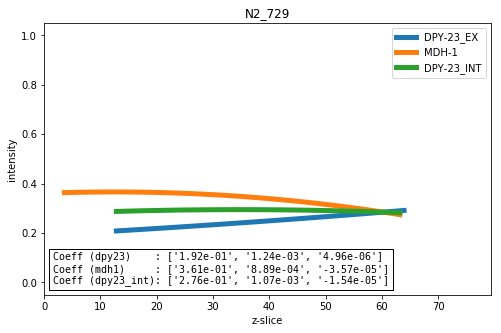

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_730.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_730.csv


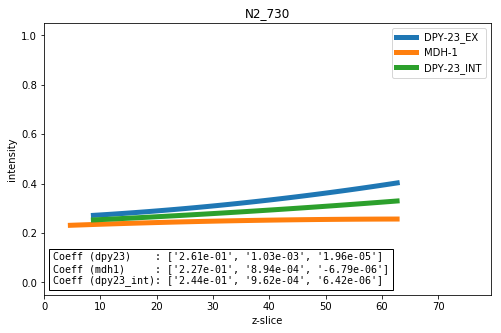

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_731.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_731.csv


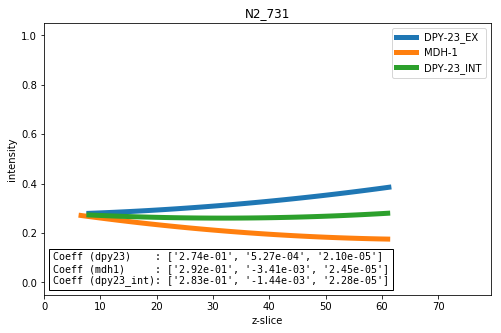

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_732.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_732.csv


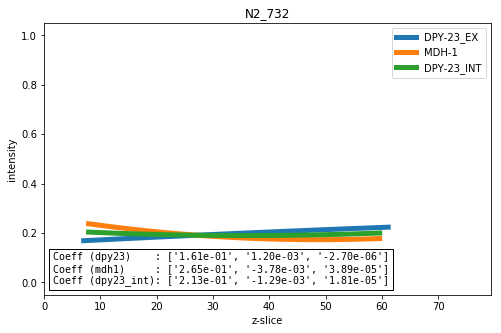

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_733.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_733.csv


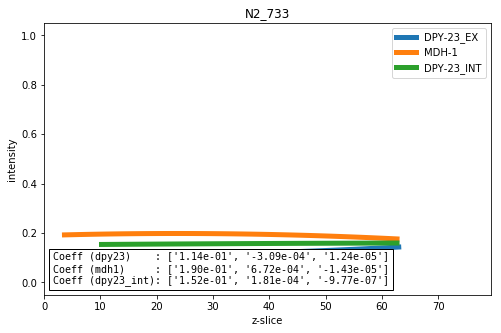

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_734.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_734.csv


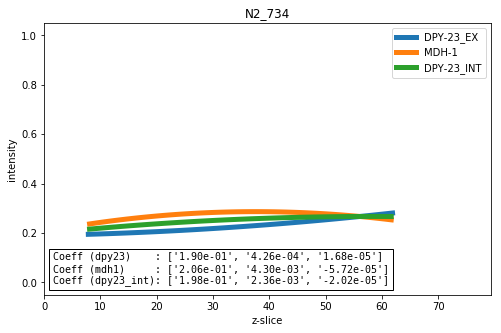

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_735.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_735.csv


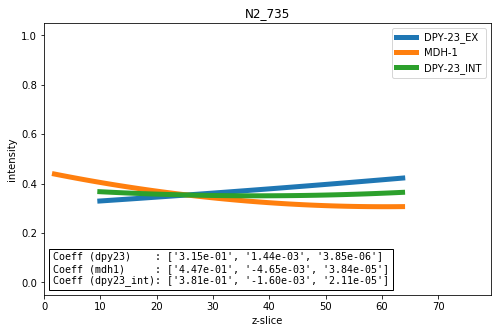

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_736.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_736.csv


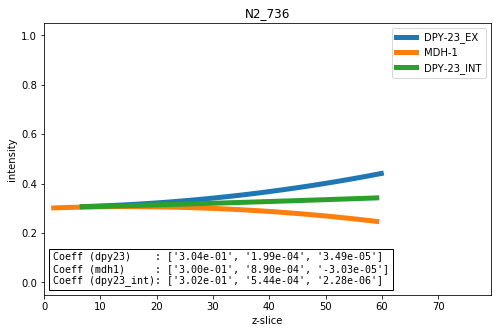

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_737.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_737.csv


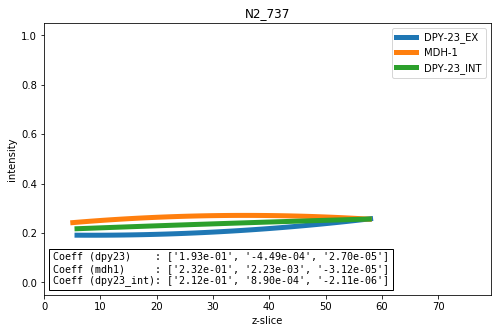

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_739.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_739.csv


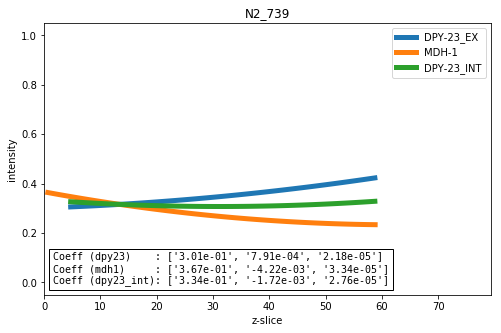

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_740.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_740.csv


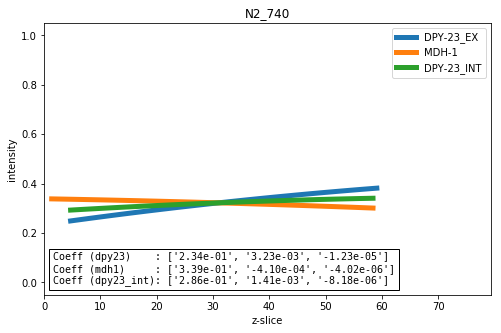

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_741.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_741.csv


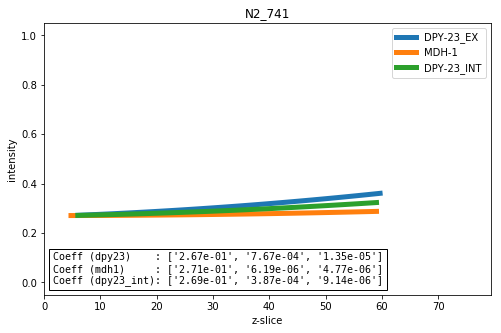

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_742.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_742.csv


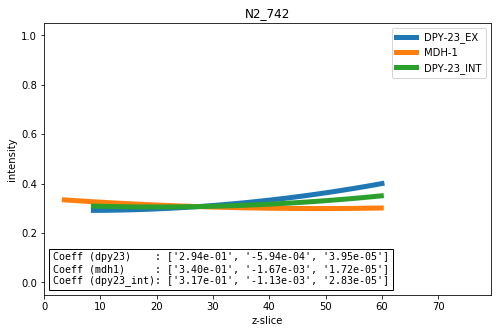

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_743.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_743.csv


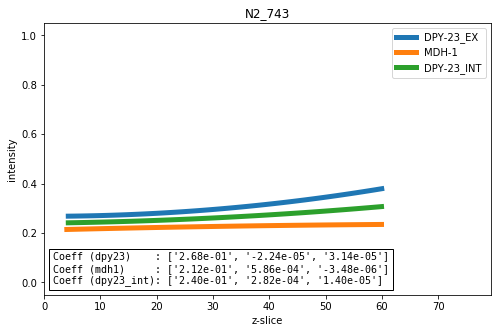

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_744.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_744.csv


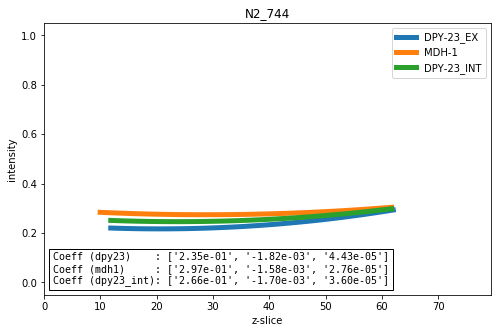

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_745.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_745.csv


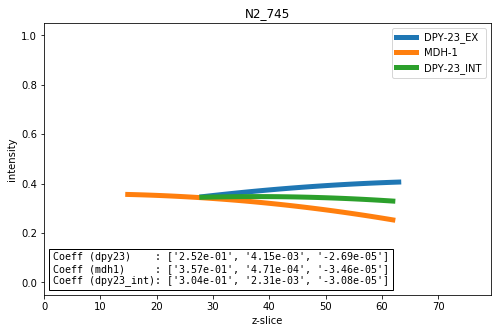

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_746.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_746.csv


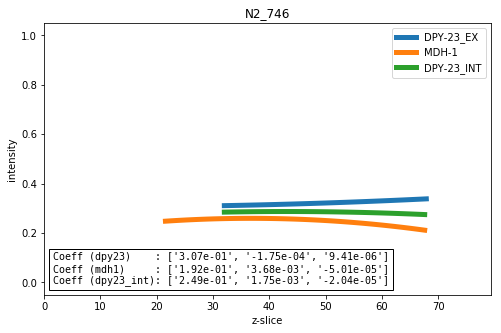

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_747.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_747.csv


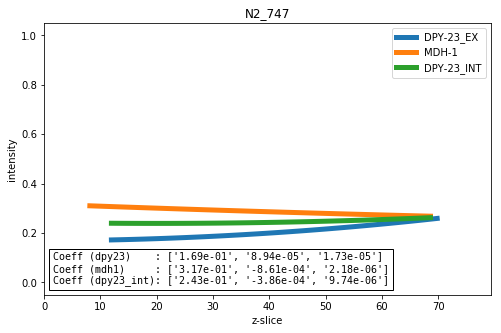

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_748.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_748.csv


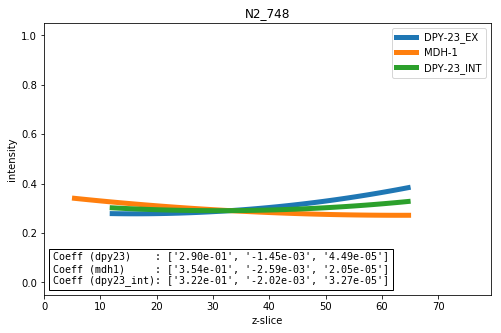

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_749.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_749.csv


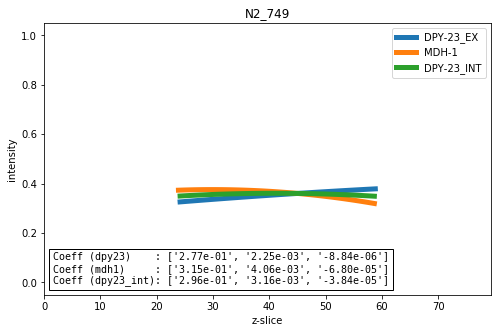

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_750.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_750.csv


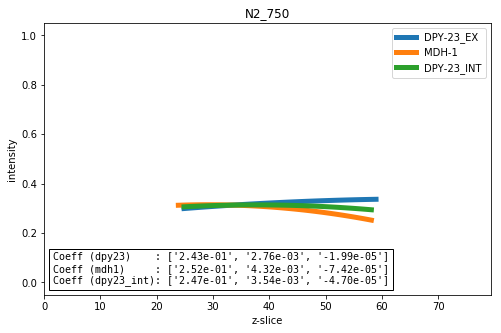

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_751.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_751.csv


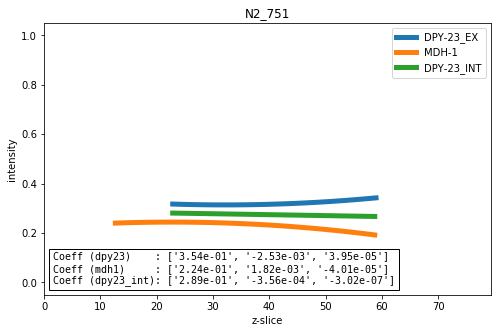

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_752.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_752.csv


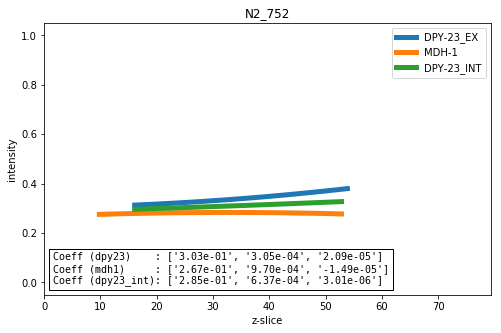

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_753.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_753.csv


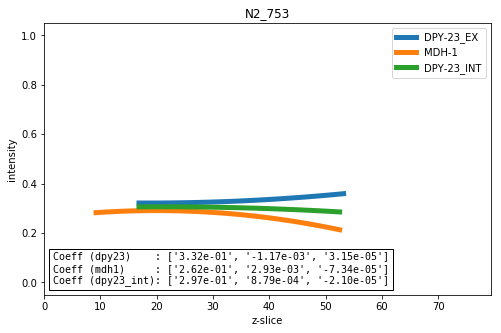

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_754.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_754.csv


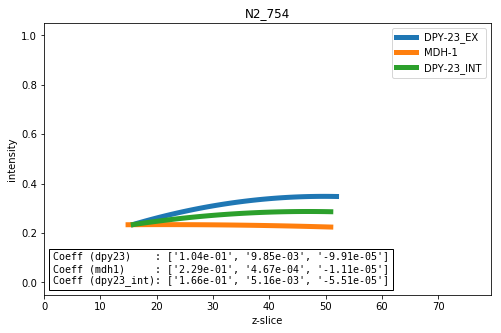

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_755.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_755.csv


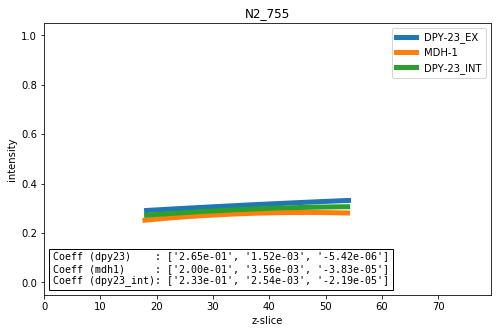

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_756.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_756.csv


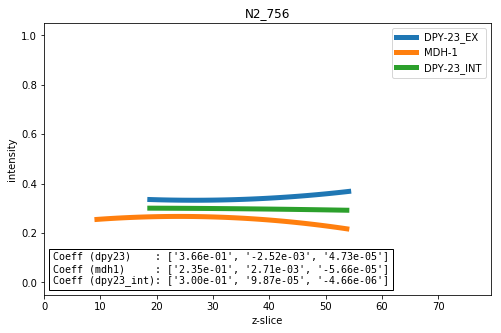

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_757.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_757.csv


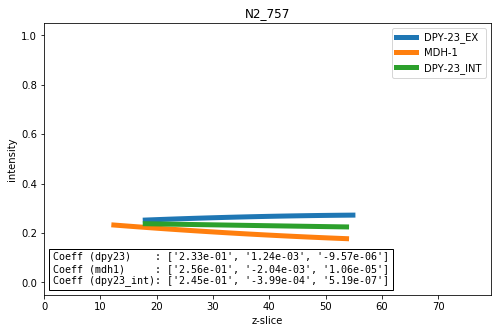

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_758.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_758.csv


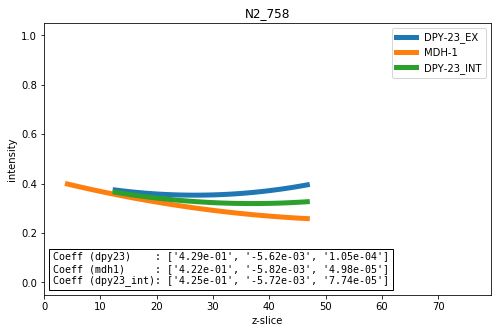

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_759.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_759.csv


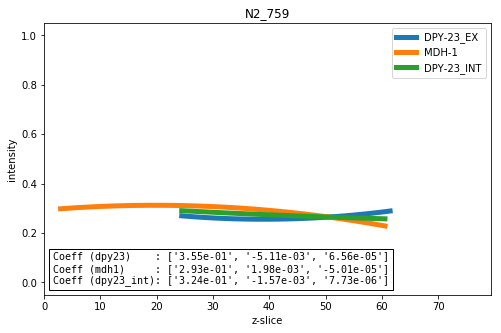

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_760.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_760.csv


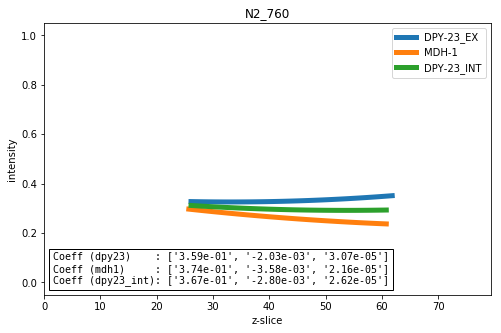

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_761.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_761.csv


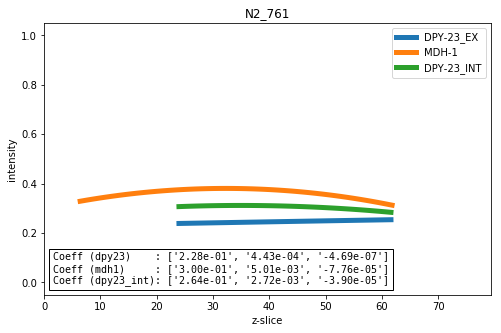

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_762.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_762.csv


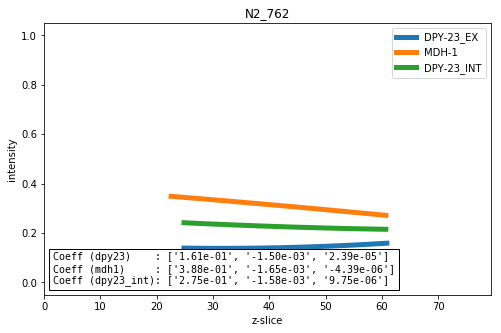

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_763.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_763.csv


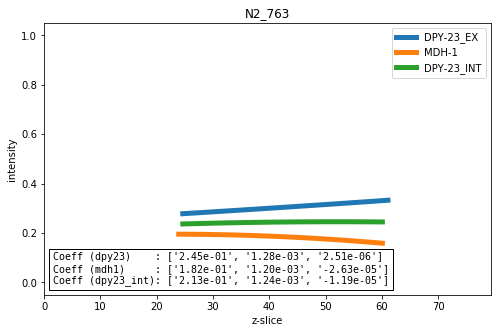

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_764.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_764.csv


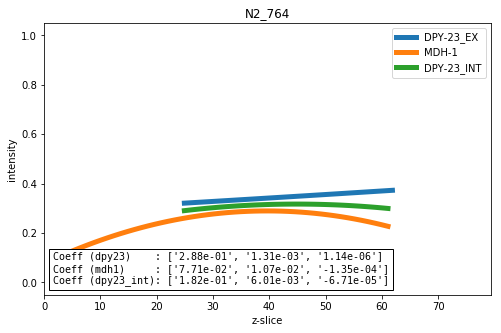

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_765.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_765.csv


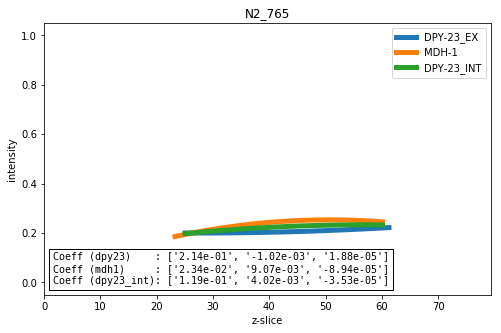

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_766.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_766.csv


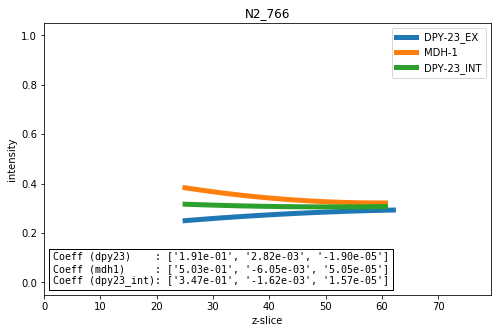

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_770.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_770.csv


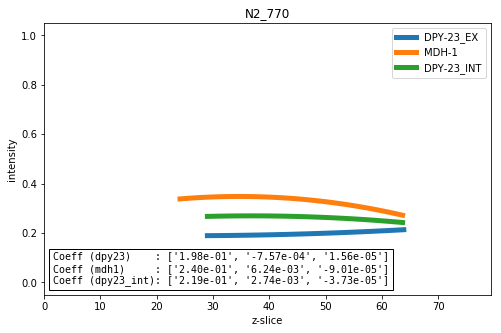

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_771.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_771.csv


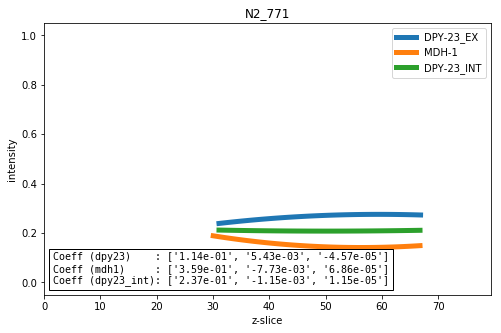

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_772.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_772.csv


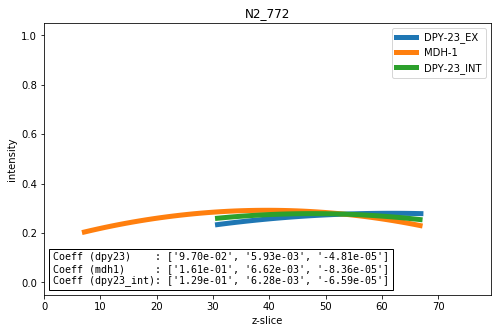

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_773.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_773.csv


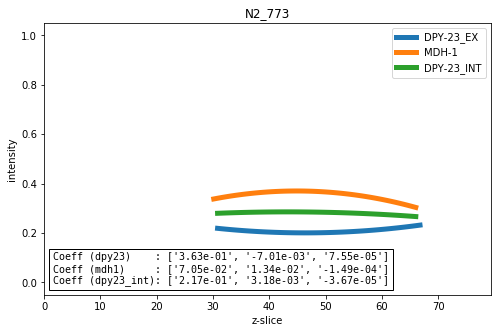

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_774.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_774.csv


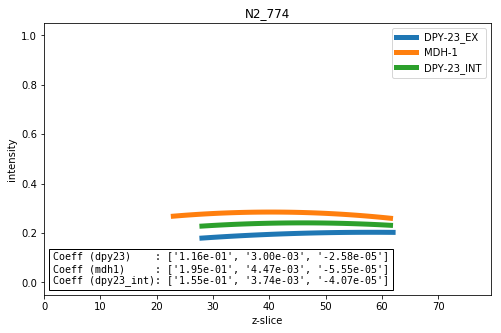

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_775.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_775.csv


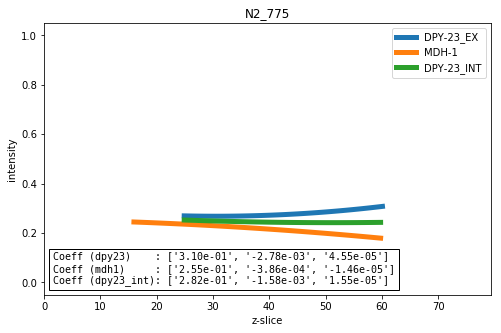

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_776.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_776.csv


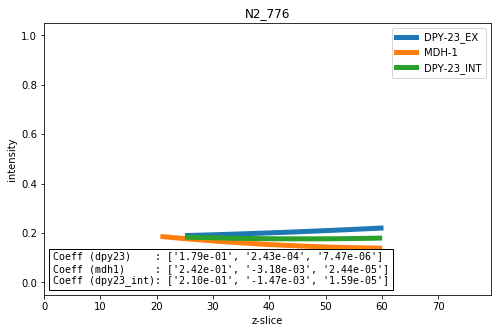

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_777.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_777.csv


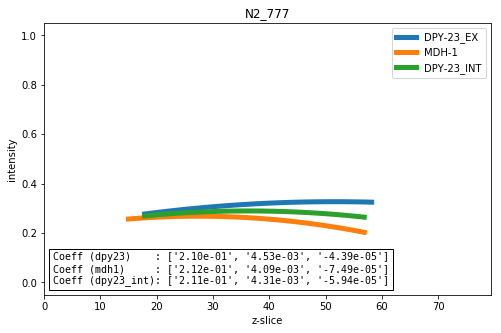

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_778.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_778.csv


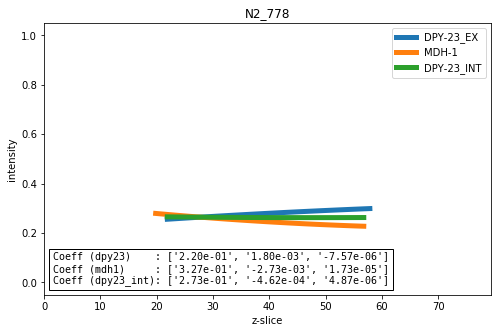

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_779.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_779.csv


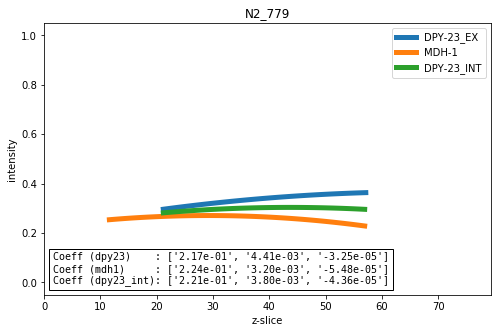

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_780.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_780.csv


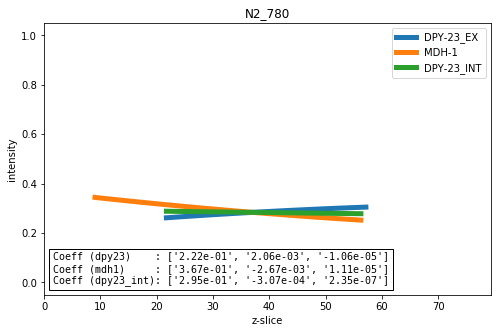

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_781.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_781.csv


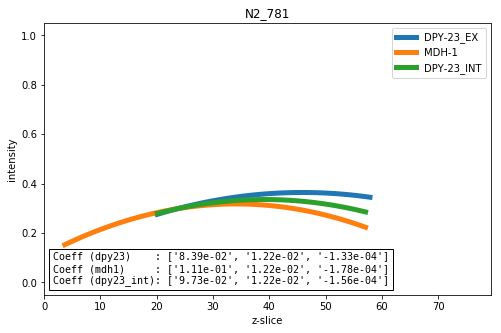

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_782.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_782.csv


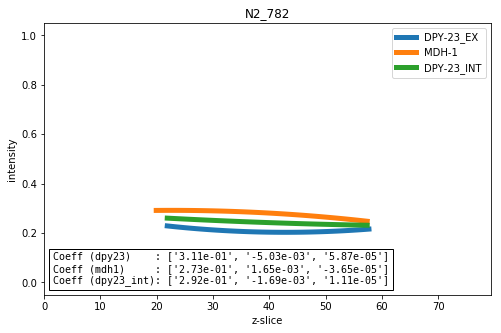

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_783.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_783.csv


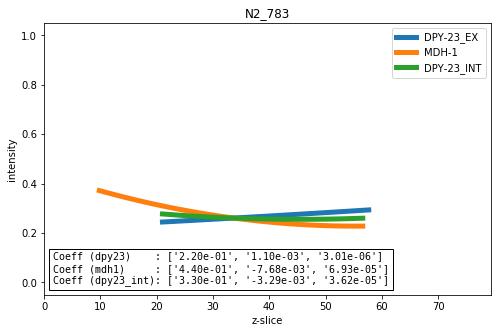

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_784.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_784.csv


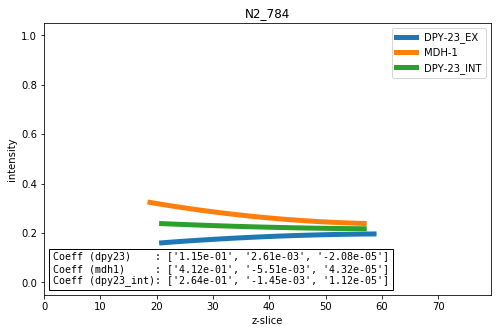

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_785.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_785.csv


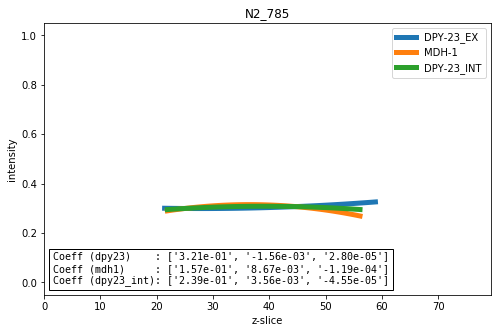

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_786.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_786.csv


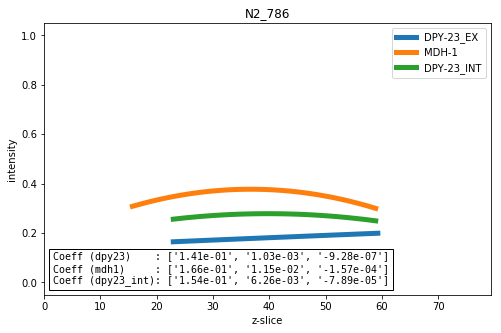

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_787.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_787.csv


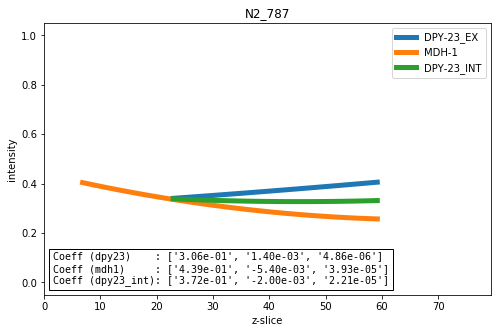

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_788.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_788.csv


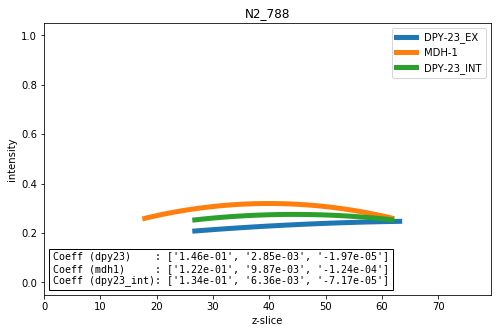

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_789.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_789.csv


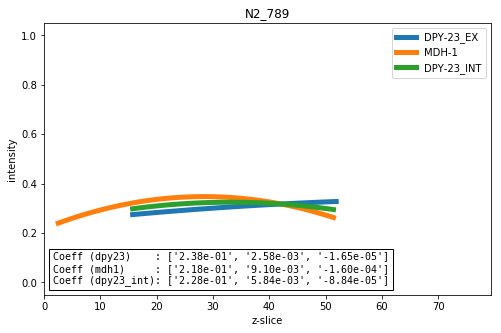

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_790.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_790.csv


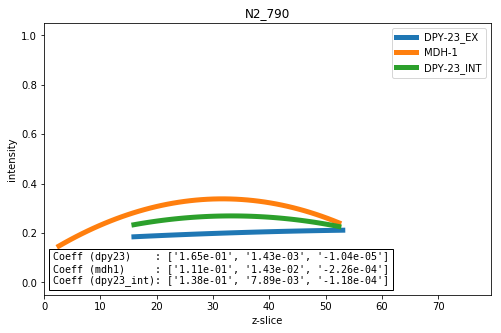

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_791.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_791.csv


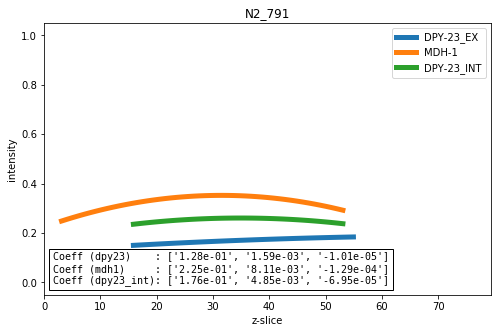

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_792.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_792.csv


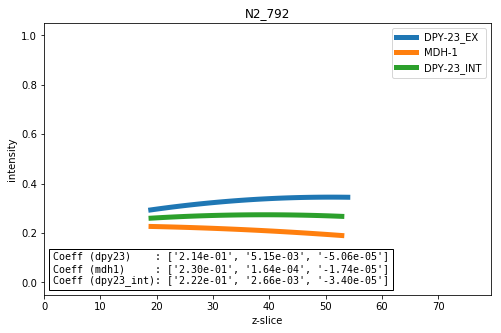

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_793.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_793.csv


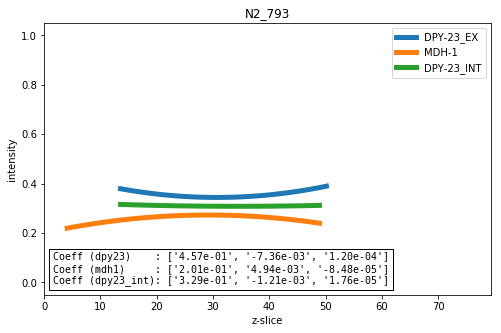

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_794.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_794.csv


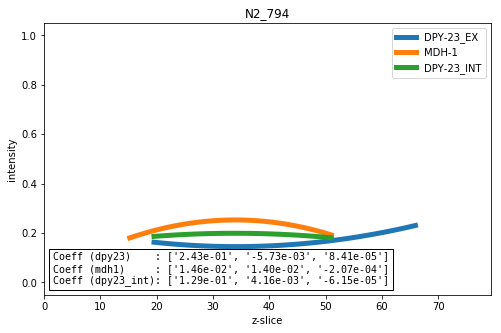

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_795.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_795.csv


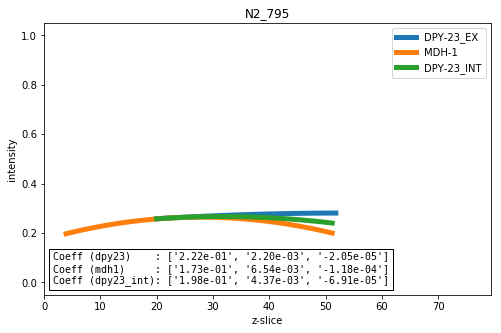

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_796.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_796.csv


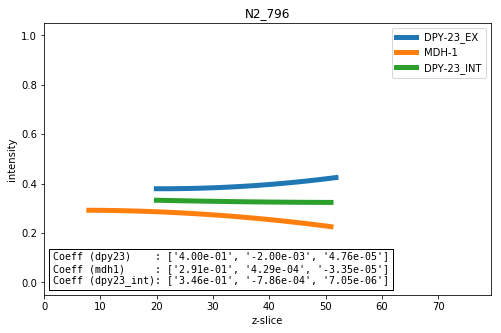

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_797.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_797.csv


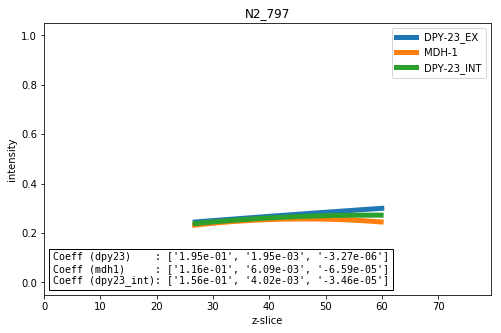

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_798.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_798.csv


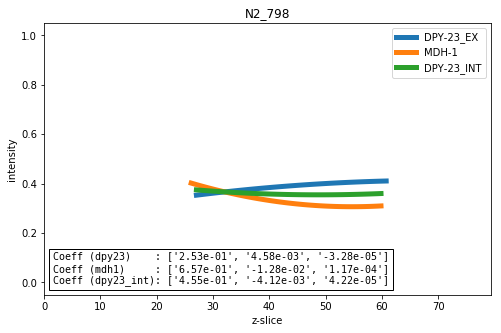

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_799.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_799.csv


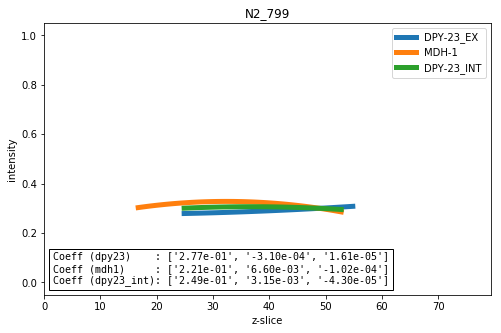

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_800.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_800.csv


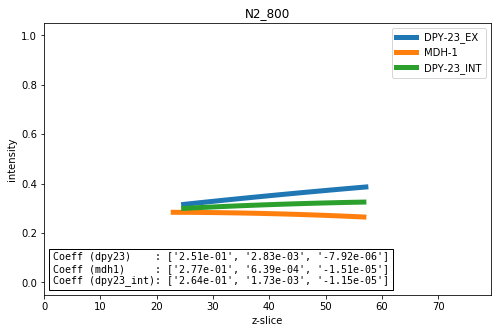

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_801.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_801.csv


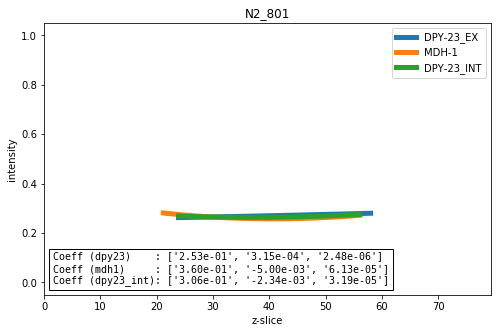

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_802.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_802.csv


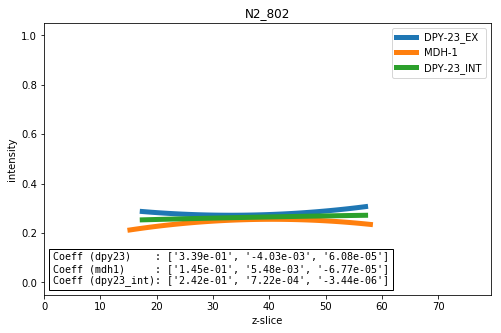

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_803.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_803.csv


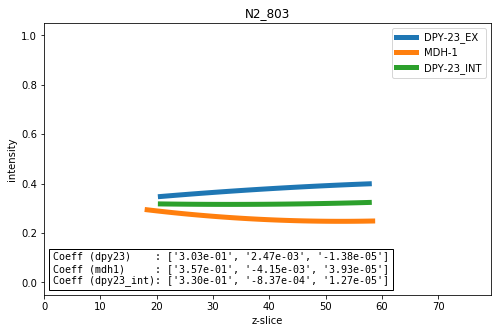

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_804.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_804.csv


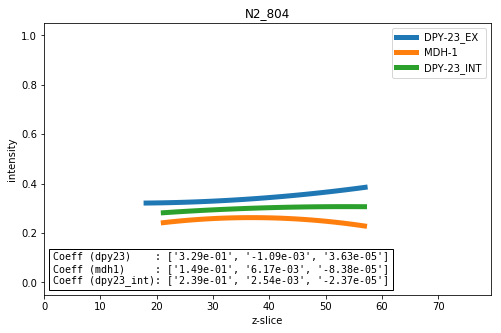

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_805.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_805.csv


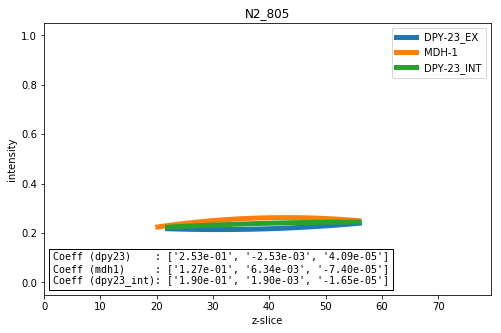

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_822.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_822.csv


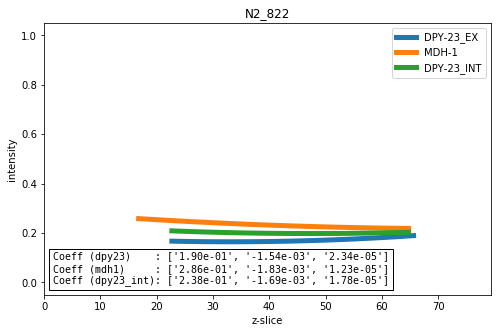

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_823.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_823.csv


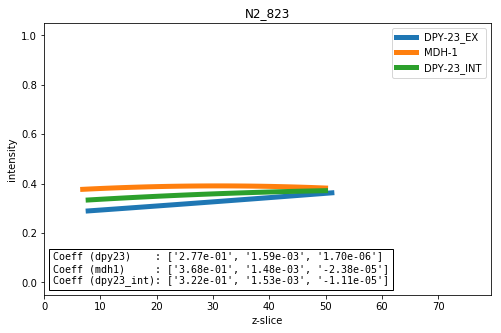

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_824.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_824.csv


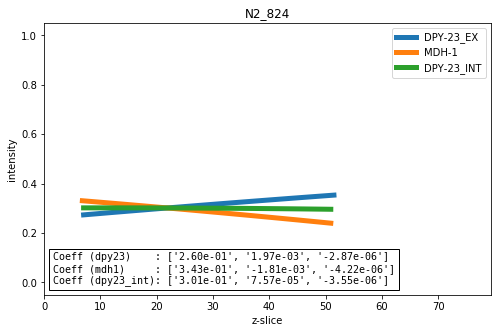

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_825.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_825.csv


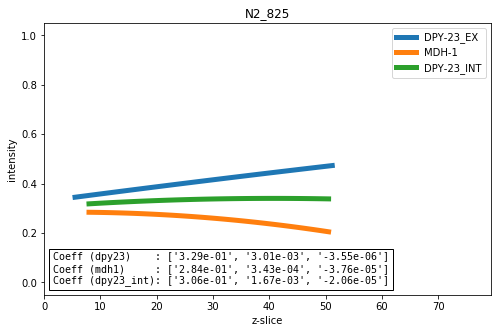

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_826.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_826.csv


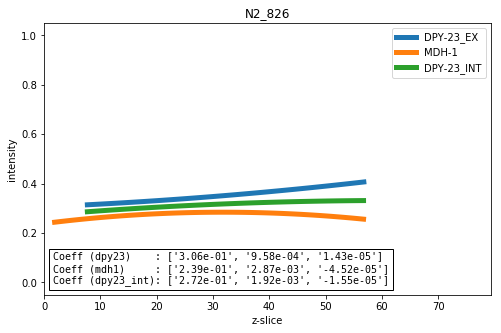

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_827.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_827.csv


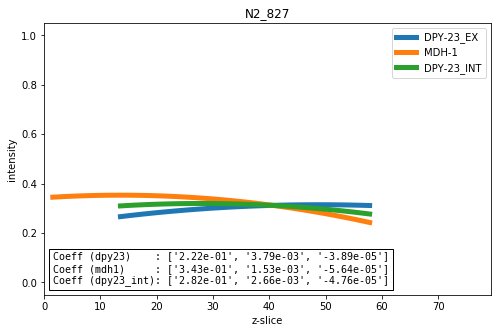

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_828.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_828.csv


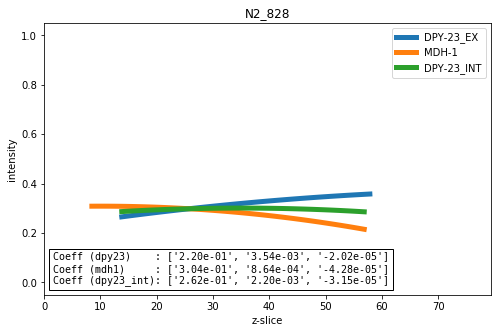

/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C2-N2_829.csv
/Users/kkolyva/Desktop/2018-07-31-09-53-32-N2-all-results-together/csv-before/C1-N2_829.csv


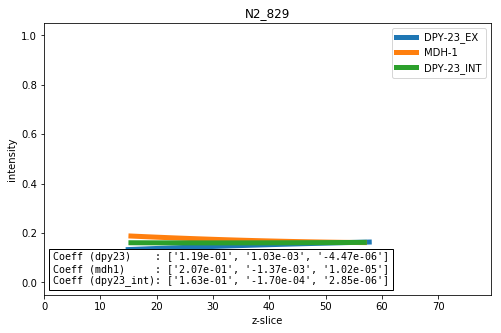

In [97]:
# actual plotting 
# dataset_dpy23 and dataset_mdh1 sizes are the same
for img_name_dpy23_mdh1_dpy23_int in dataset_dpy23_mdh1_dpy23_int:
    
    img_name_dpy23 = img_name_dpy23_mdh1_dpy23_int[0]
    img_name_mdh1 = img_name_dpy23_mdh1_dpy23_int[1]
    img_name_dpy23_int = img_name_dpy23_mdh1_dpy23_int[2]
       
    s_dataset_mdh1 = folder_path + "csv-before/" + img_name_mdh1 + ".csv"
    ps_dataset_mdh1 = folder_path + "csv-parameters/" + img_name_mdh1 + ".csv"

    s_dataset_dpy23 = folder_path + "csv-before/" + img_name_dpy23 + ".csv"
    ps_dataset_dpy23 = folder_path + "csv-parameters/" + img_name_dpy23 + ".csv"
    
    ps_dataset_dpy23_int = folder_path + "csv-parameters-int/" + img_name_dpy23_int + ".csv"
    
    if(not os.path.exists(s_dataset_mdh1) or not os.path.exists(s_dataset_dpy23)):
        # print("doesn't exist")
        continue
    try:
        print(s_dataset_mdh1)
        print(s_dataset_dpy23)
        
        # print("Processing:", dataset[idx]) 
        z_dpy23, I_dpy23 = load_data(s_dataset_dpy23)
        z_mdh1, I_mdh1 = load_data(s_dataset_mdh1)

        # load the parameters from file
        coeff_dpy23 = load_params(ps_dataset_dpy23)
        coeff_mdh1 = load_params(ps_dataset_mdh1)

        # print(title, ":", coeff)  
        # print('from {0} to {1}'.format(np.min(z), np.max(z)))

        x_dpy23_fit = np.linspace(np.min(z_dpy23), np.max(z_dpy23)) 
        y_dpy23_fit = g_x(coeff_dpy23[::-1], x_dpy23_fit) 
        
        x_mdh1_fit = np.linspace(np.min(z_mdh1), np.max(z_mdh1))
        y_mdh1_fit = g_x(coeff_mdh1[::-1], x_mdh1_fit) 

        # construct the intron curve
        coeff_dpy23_int = compute_average_curve(coeff_dpy23, coeff_mdh1)
        z_dpy23_int_min, z_dpy23_int_max = find_min_max(z_dpy23, z_mdh1)
        x_dpy23_int_fit = np.linspace(z_dpy23_int_min, z_dpy23_int_max)
        y_dpy23_int_fit = g_x(coeff_dpy23_int[::-1], x_dpy23_int_fit) 
        
        # save the new curves
        np.savetxt(ps_dataset_dpy23_int, [coeff_dpy23_int], delimiter='\t')
        
        # feedback
        plt.figure(figsize=(8,5))
        title = create_title(s_dataset_dpy23, name_id=-1)[3:]
        plt.title(title)
        
        plt.plot(x_dpy23_fit, y_dpy23_fit, linewidth=5, label=labels[0])
        plt.plot(x_mdh1_fit, y_mdh1_fit, linewidth=5, label=labels[1])
        
        plt.plot(x_dpy23_int_fit, y_dpy23_int_fit, linewidth=5, label=labels[2])
        
        x_limits = [z_min, z_max]
        y_limits = [-0.05, 1.05]
        
        axes = plt.gca()
        axes.set_xlim(x_limits)
        axes.set_ylim(y_limits)

        plt.xlabel('z-slice')
        plt.ylabel('intensity')
        
        info_text_dpy23 =     "Coeff (dpy23)    : " + str(['%.2e' % elem for elem in coeff_dpy23])
        info_text_mdh1 =      "Coeff (mdh1)     : " + str(['%.2e' % elem for elem in coeff_mdh1])
        info_text_dpy23_int = "Coeff (dpy23_int): " + str(['%.2e' % elem for elem in coeff_dpy23_int])
        
        info_text = info_text_dpy23 + "\n" + info_text_mdh1 + "\n" + info_text_dpy23_int
        plt.text(x_limits[0] + (x_limits[1] - x_limits[0])*0.02, y_limits[0] + (y_limits[1] - y_limits[0])*0.04, info_text, color='black', bbox=dict(facecolor='white', alpha=1), family='monospace')

        plt.legend(loc = 'upper right')
        full_path_to_use = folder_path + "img-overlapped/" 
        if not os.path.exists(full_path_to_use):
            os.makedirs(full_path_to_use)
        plt.savefig(full_path_to_use + title + ".pdf")
        
        plt.show()
    except(RuntimeError, TypeError, ValueError, StopIteration):
        print("There was an exception but we\'ll fix it for you")